# Dataset statistics

Since Sat. Feb. 26th, 2022


Understand the input representation to models, e.g. token size distribution, warnings in extraction


## Setup



In [1]:
%load_ext autoreload
%autoreload 2


import os
os.chdir('../..')  # so that import works

import pandas as pd
from matplotlib import rcParams

from stefutil import *
from musicnlp.preprocess import dataset
from musicnlp.postprocess import MusicVisualize


pd.set_option('display.max_rows', None)
rcParams['figure.figsize'] = (16, 10)  # TODO: `stefutil` setting rc doesn't seem to help???
rcParams['figure.dpi'] = 200


md = 'full'
dnms = ['POP909', 'MAESTRO', 'LMD', 'LMCI', 'NES-MDB']
pop, mst, lmd, lmc, nes = dataset.get_dataset_dir_name(*dnms)
fnms = [pop, mst, lmd, lmc, nes]
cnm = f'22-04-24_MusViz-Cache_{{md={md[0]}}}, dnm=5-0.1}}'
mv_args = dict(cache=cnm, subset=0.1, subset_bound=8196)
mv = MusicVisualize(filename=fnms, dataset_name=dnms, hue_by_dataset=True, pitch_kind='degree', **mv_args)


args = dict(stat='percent', upper_percentile=90)  # For MAESTRO dataset is very spread out



2023-04-25 20:13:52|[Music Visualizer]::__init__::music_visualize.py:104:INFO: Initializing MusicVisualize with {cache: 22-04-24_MusViz-Cache_{md=f}, dnm=5-0.1}, subset:   0.1, subset_bound: 8196}... 
2023-04-25 20:13:52|[Music Visualizer]::__init__::music_visualize.py:105:INFO: Getting global stats... 
2023-04-25 20:13:52|[Music Visualizer]::__init__::music_visualize.py:112:INFO: Loading cached stats from /Users/stefanhg/Documents/UMich/Research/Music with NLP/Symbolic-Music-Generation/plot/cache/22-04-24_MusViz-Cache_{md=f}, dnm=5-0.1}.pkl... 
2023-04-25 20:14:33|[WordPiece Tokenizer]::from_file::wordpiece_tokenizer.py:384:INFO: Loading wordpiece tokenizer from /Users/stefanhg/Documents/UMich/Research/Music with NLP/Symbolic-Music-Generation/tokenizers/22-10-26_WordPiece-Tokenizer_{dnm=all}_{vsz=32768, n=178825, pch=d, aug-key=T}... 
2023-04-25 20:14:35|[Pair-Merge Tokenizer]::from_file::pair_merge_tokenizer.py:228:INFO: Loading Pair-Merge Tokenizer from /Users/stefanhg/Documents/UMi

## Plot



2023-04-25 20:15:35|[Music Visualizer]::hist_wrapper::music_visualize.py:310:INFO: Plotting... 


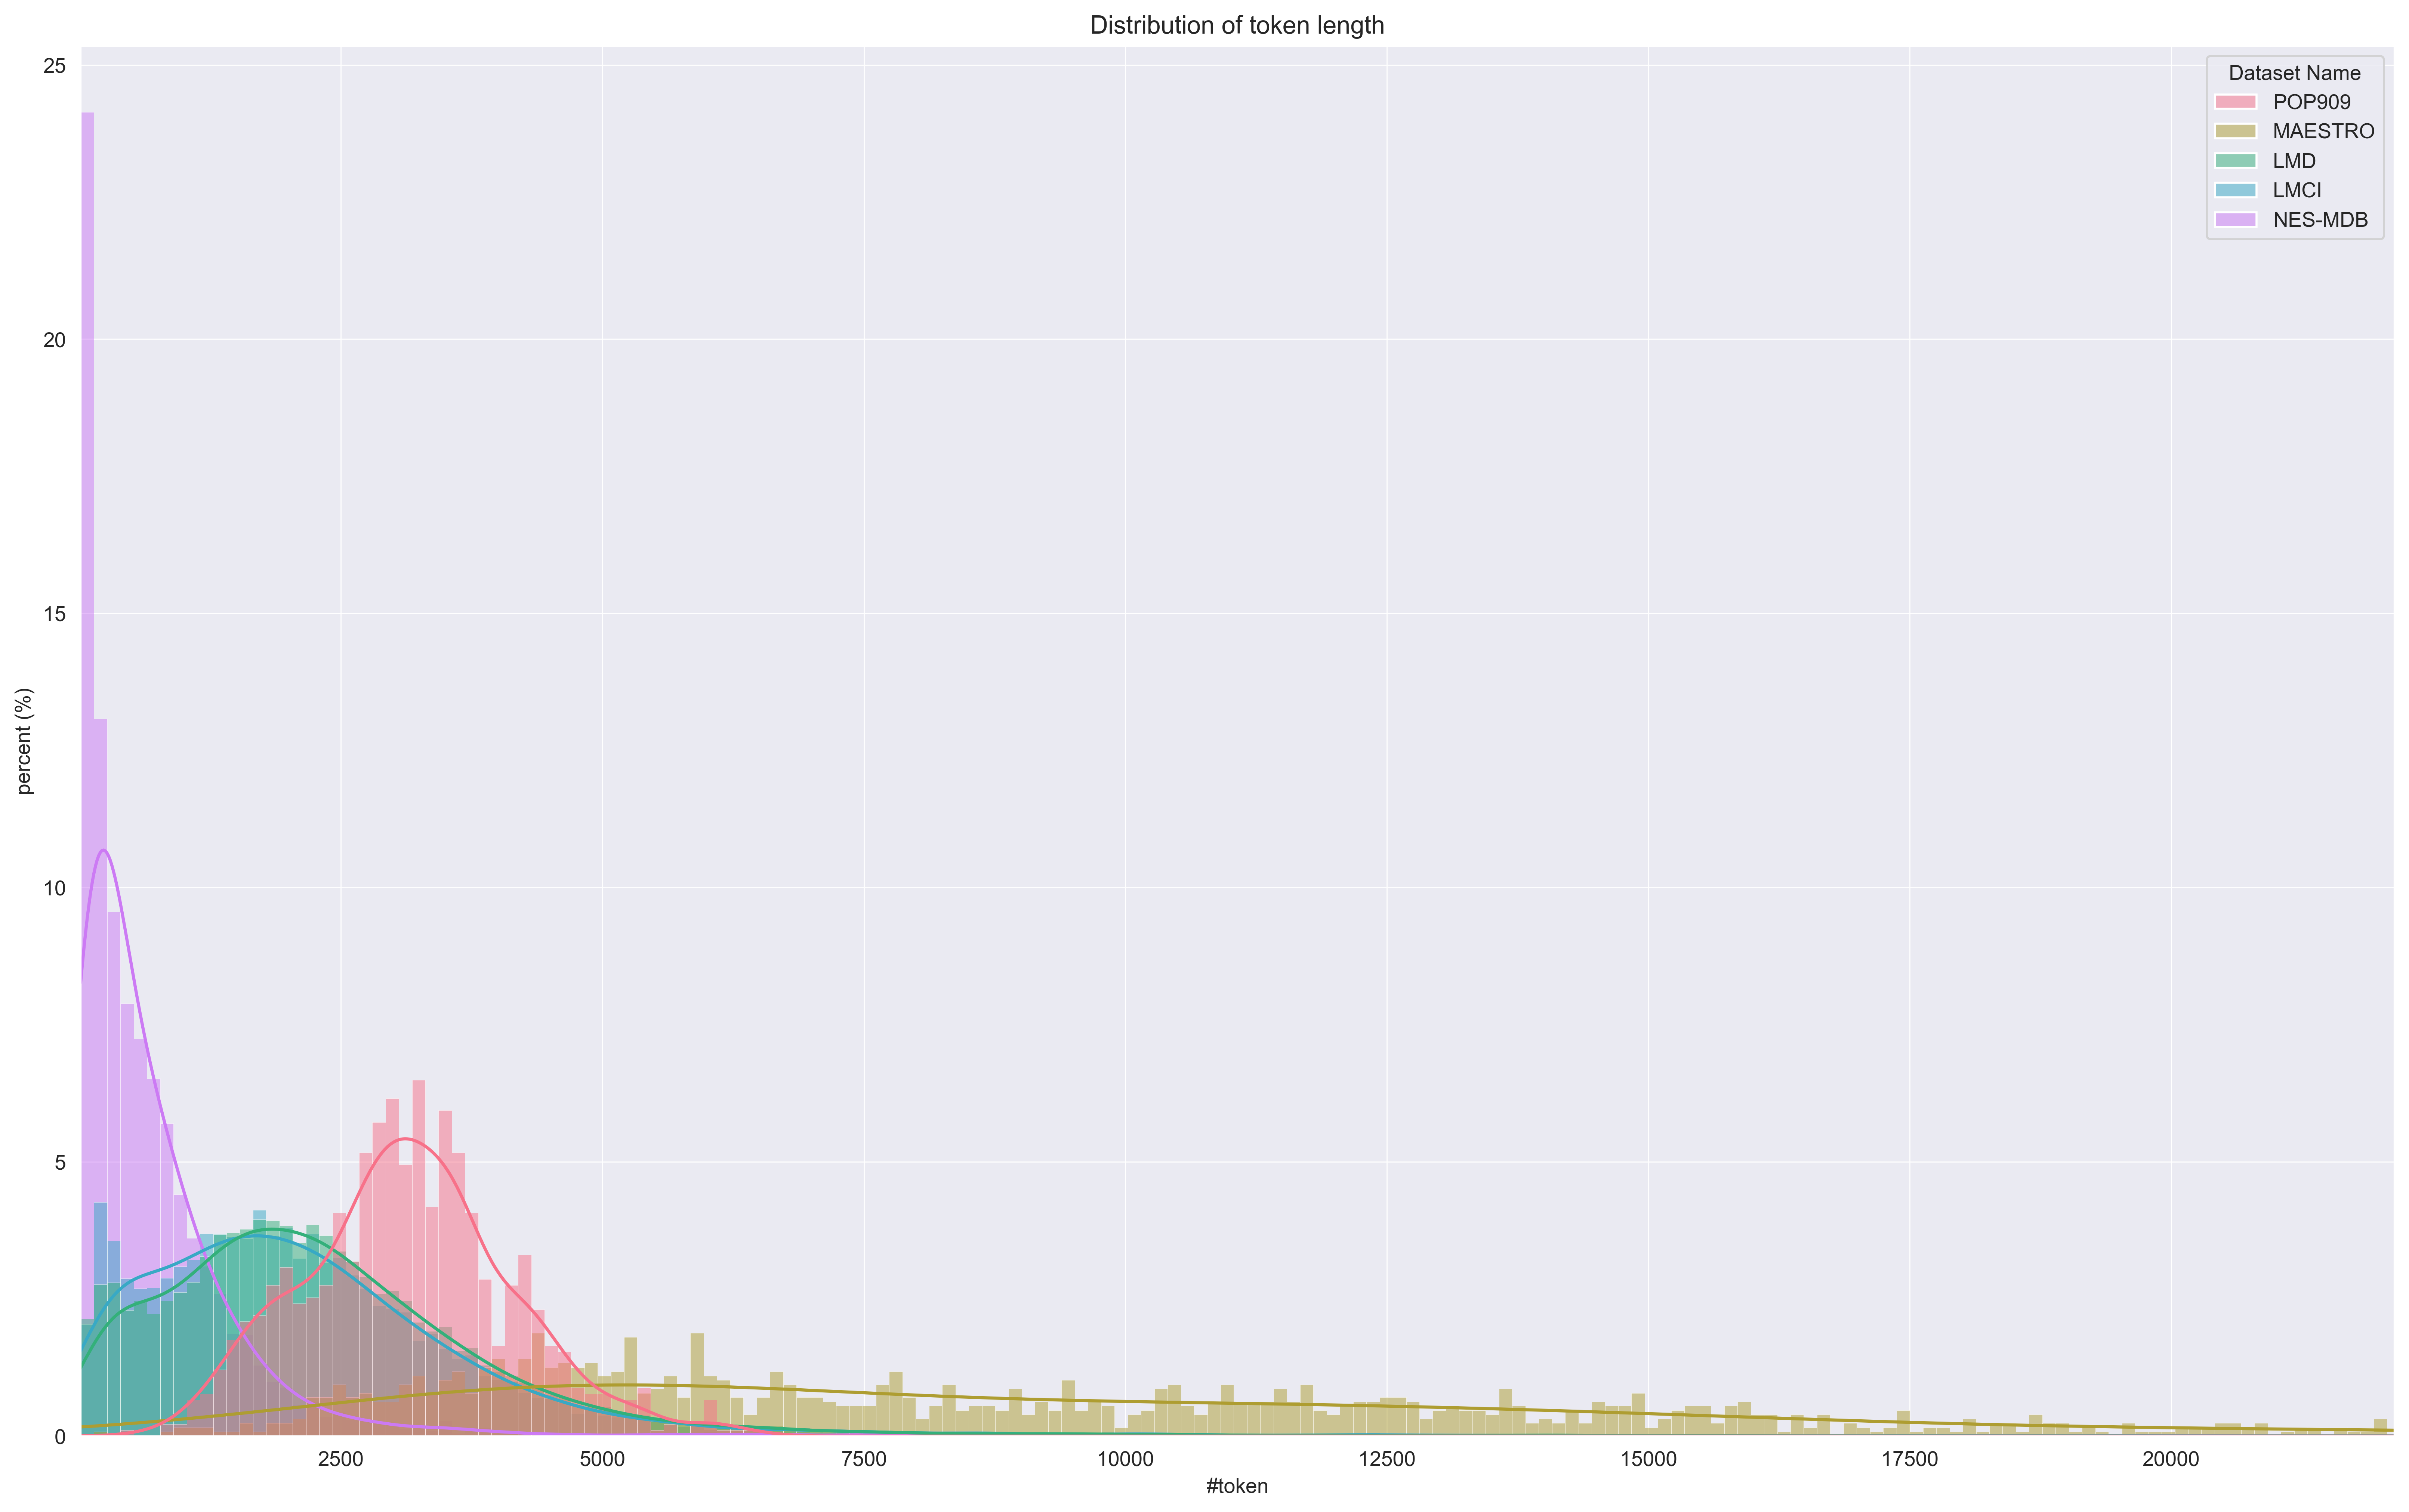

2023-04-25 20:15:46|[Music Visualizer]::hist_wrapper::music_visualize.py:310:INFO: Plotting... 


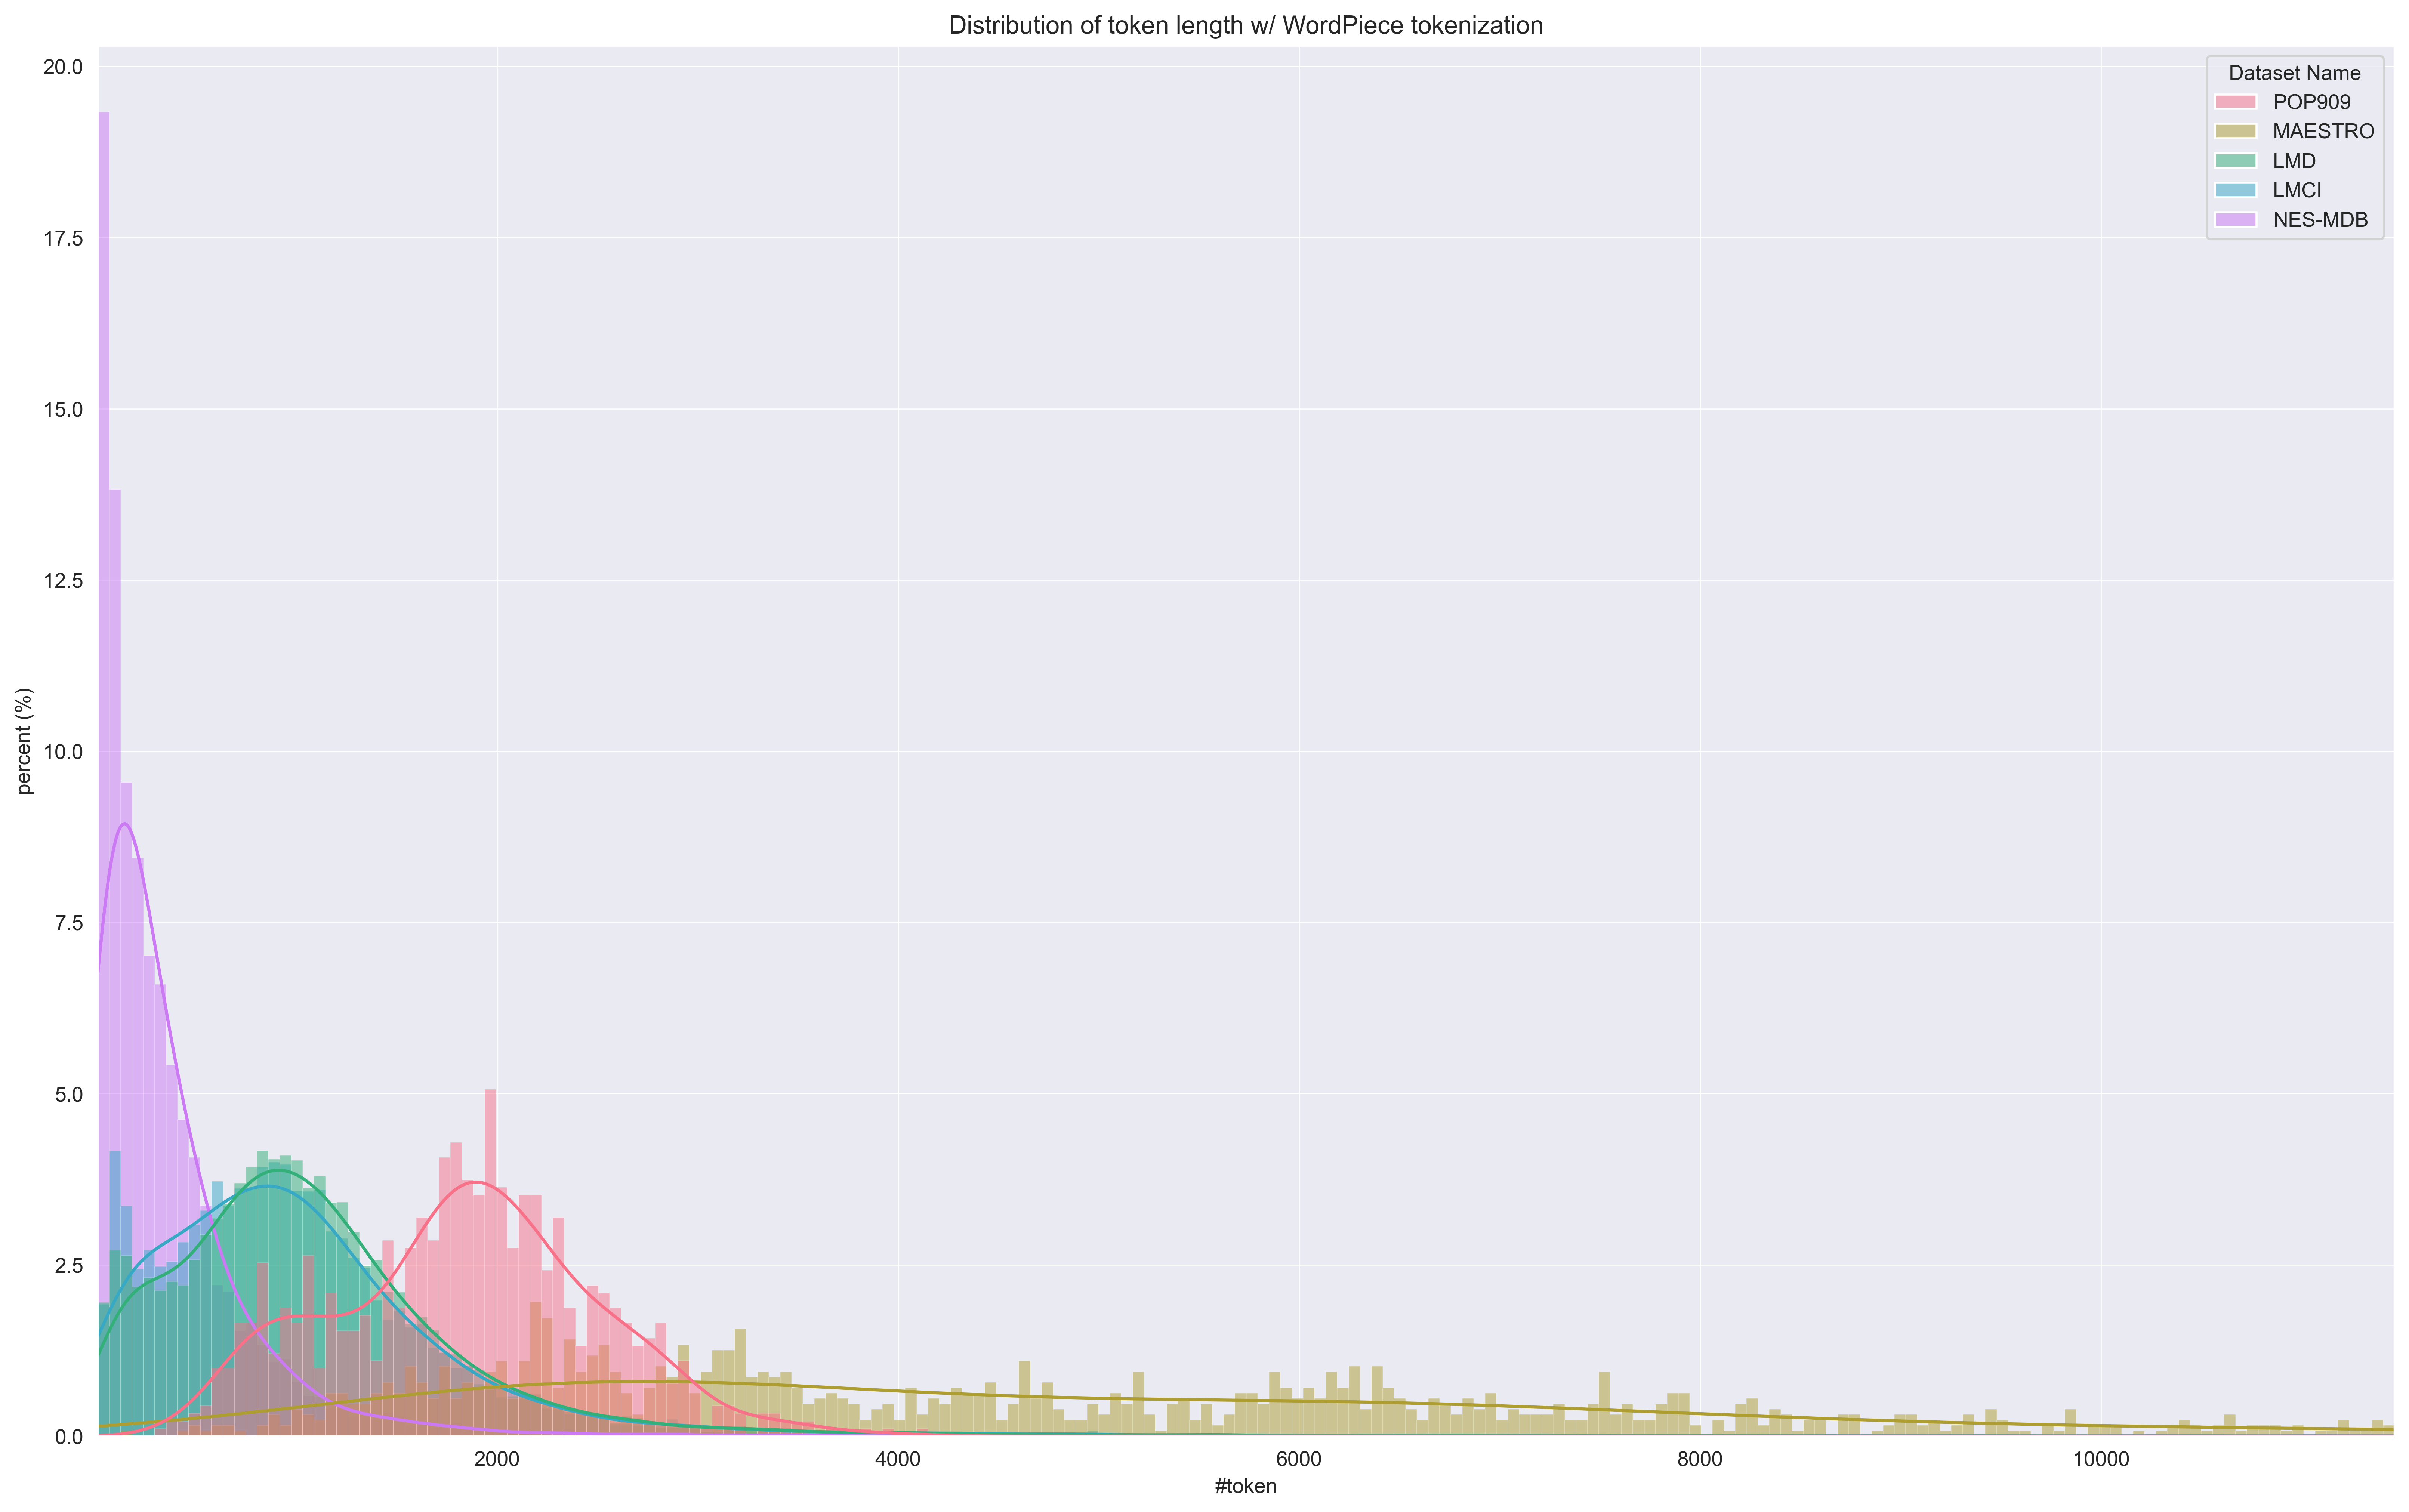

2023-04-25 20:16:00|[Music Visualizer]::hist_wrapper::music_visualize.py:310:INFO: Plotting... 


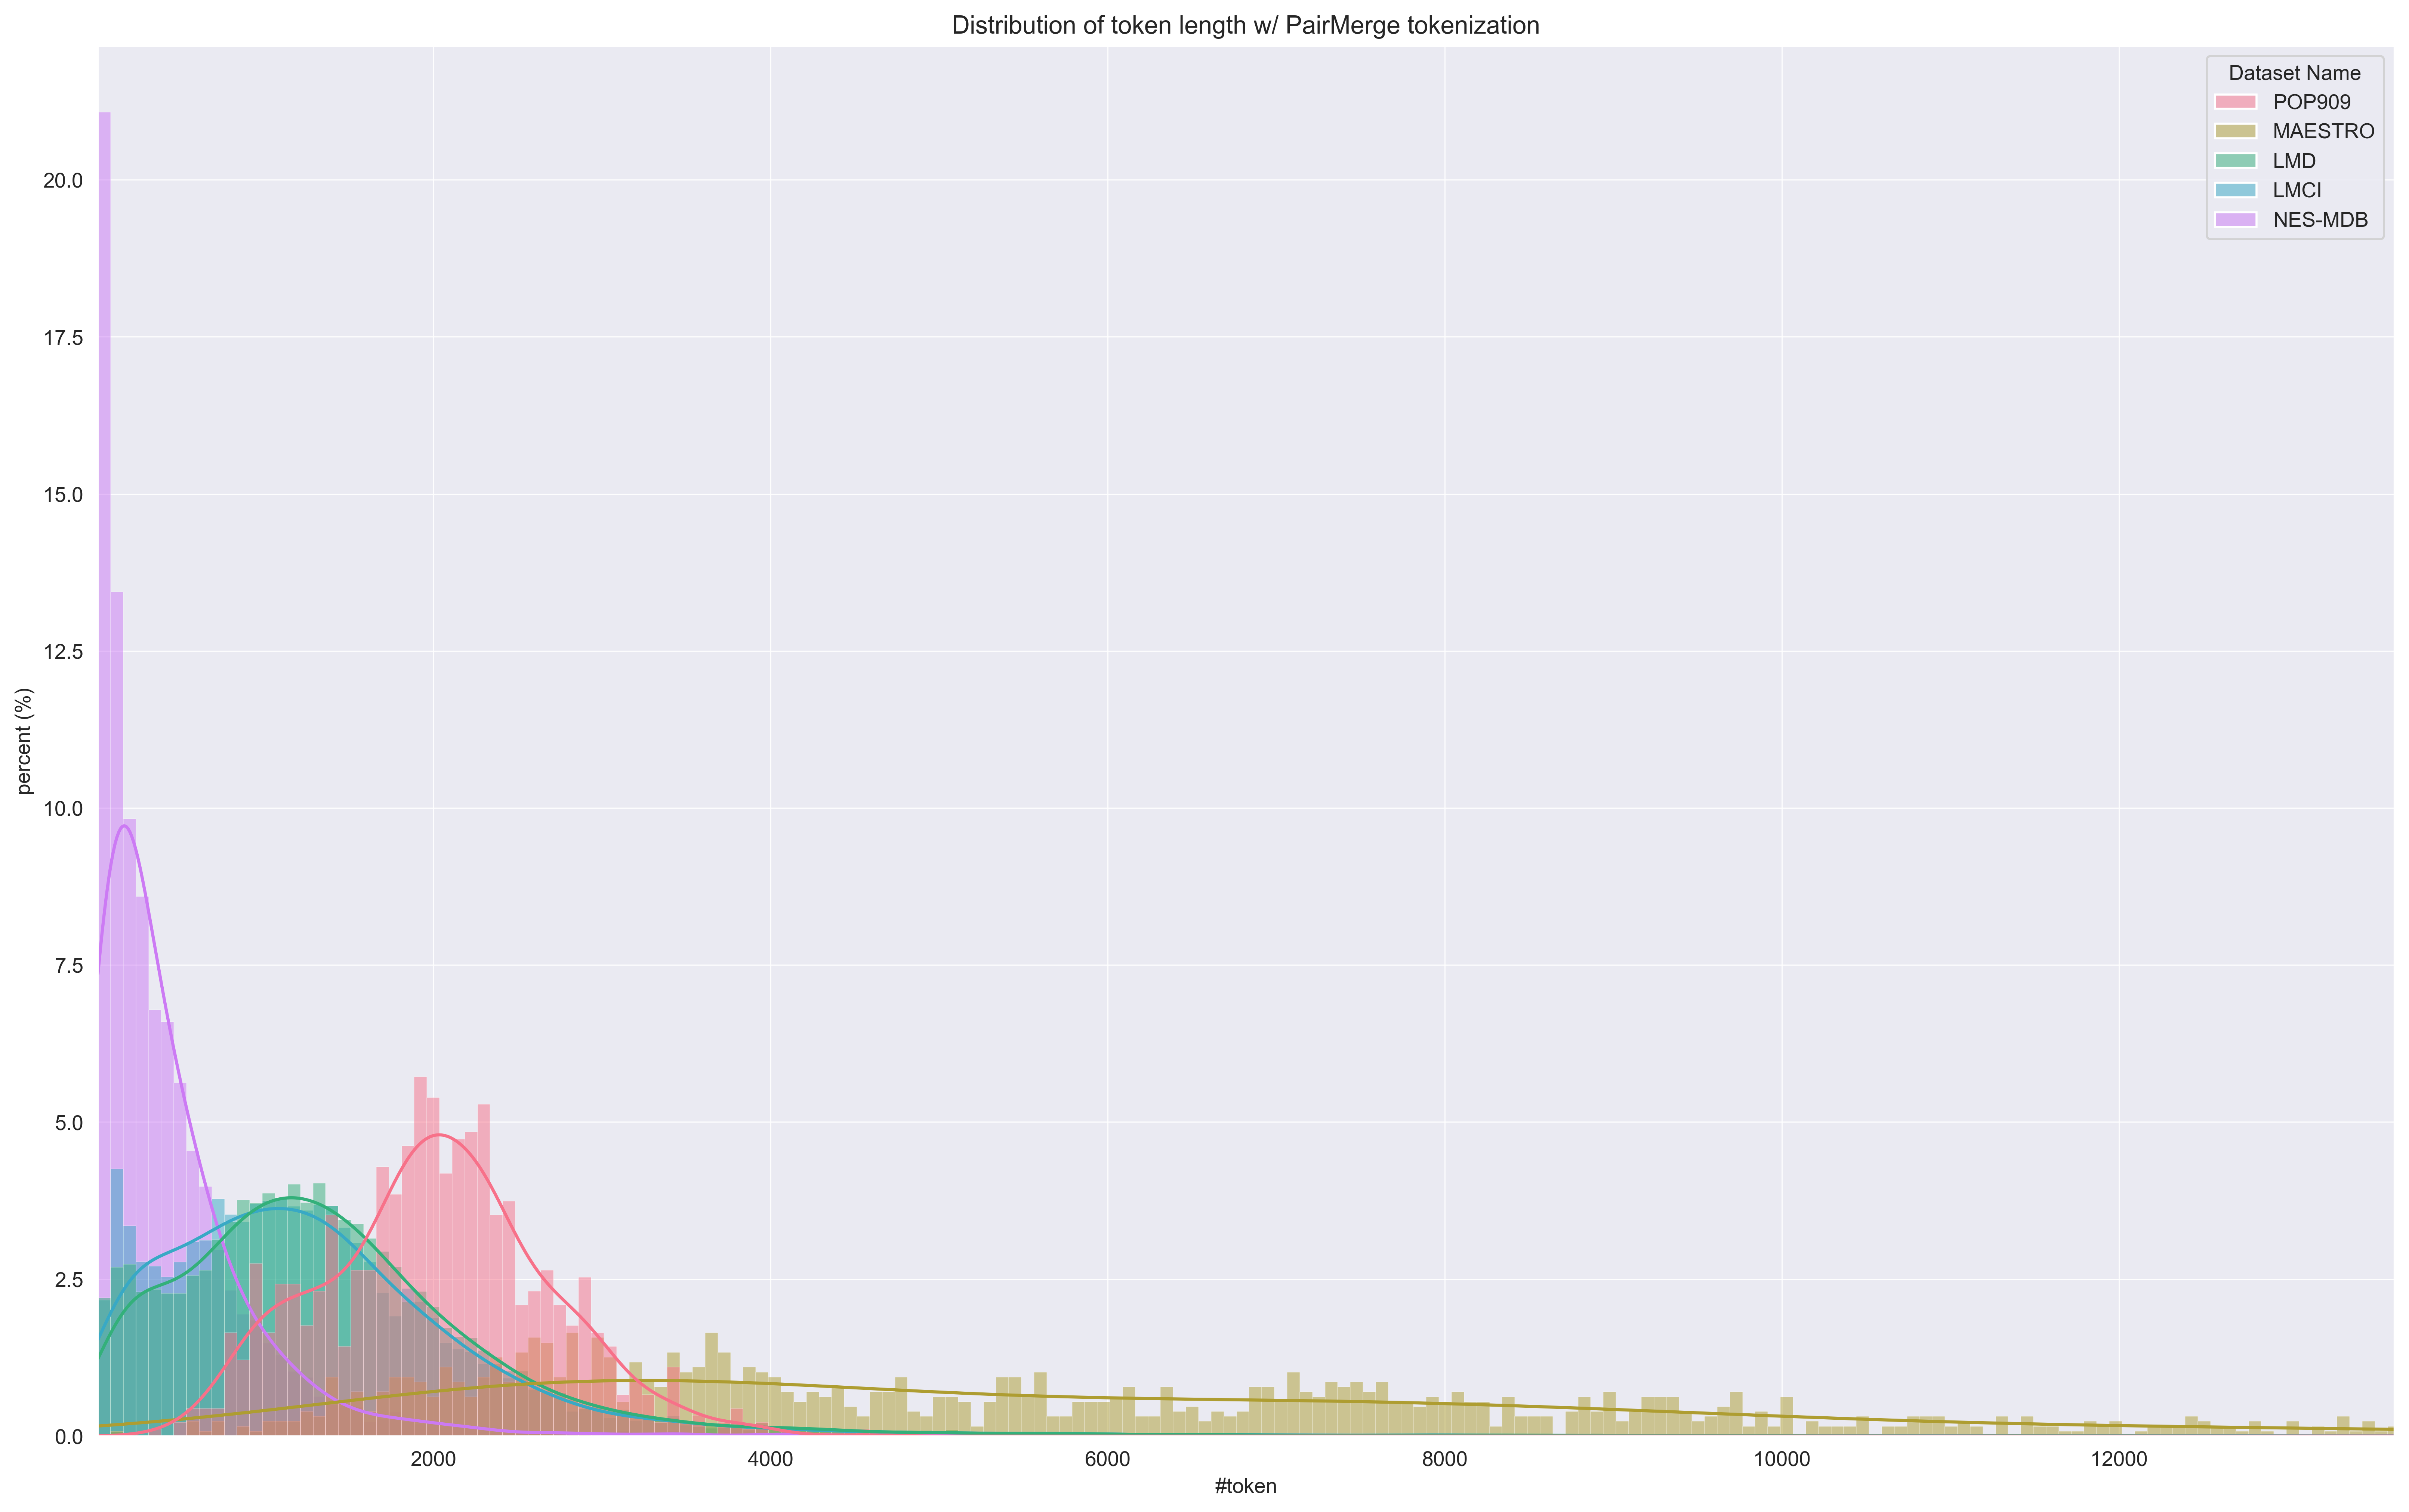

In [2]:
rcParams['figure.figsize'] = (16, 10)  # TODO
mv.token_length_dist(**args)
mv.token_length_dist(tokenize_scheme='wordpiece', **args)
mv.token_length_dist(tokenize_scheme='pairmerge', **args);



2023-04-25 20:16:40|[Music Visualizer]::hist_wrapper::music_visualize.py:310:INFO: Plotting... 


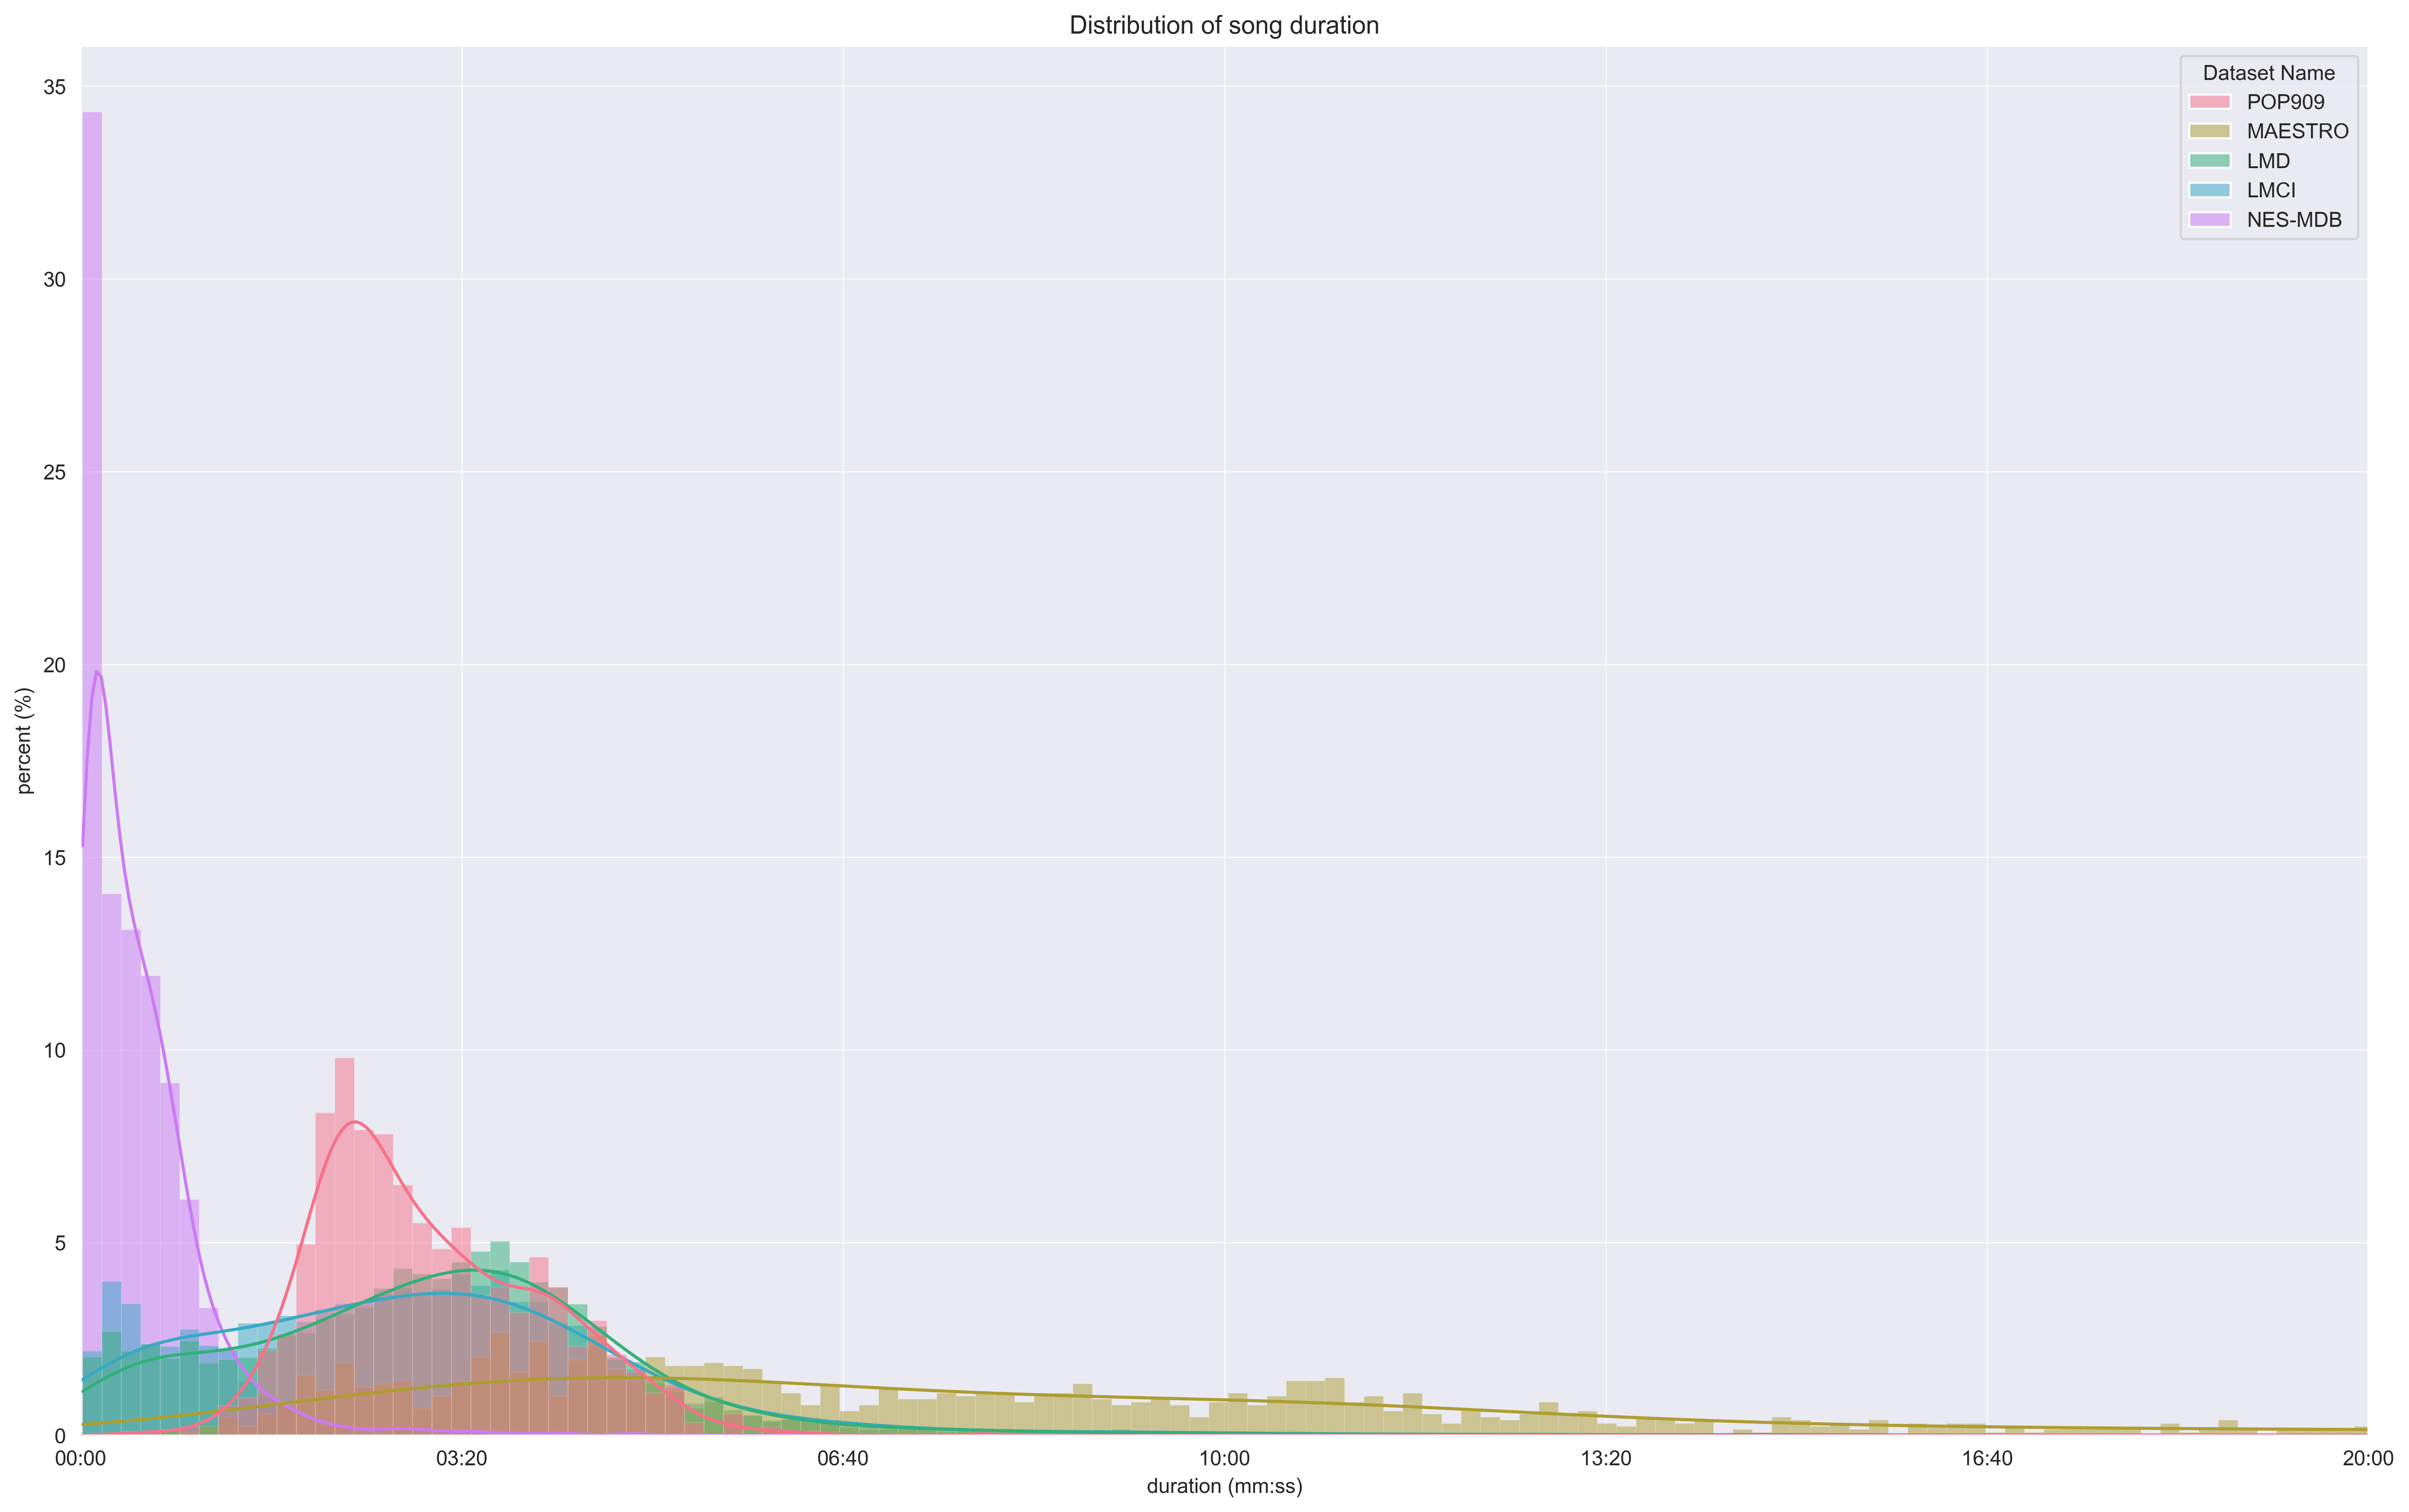

2023-04-25 20:16:56|[Music Visualizer]::hist_wrapper::music_visualize.py:310:INFO: Plotting... 


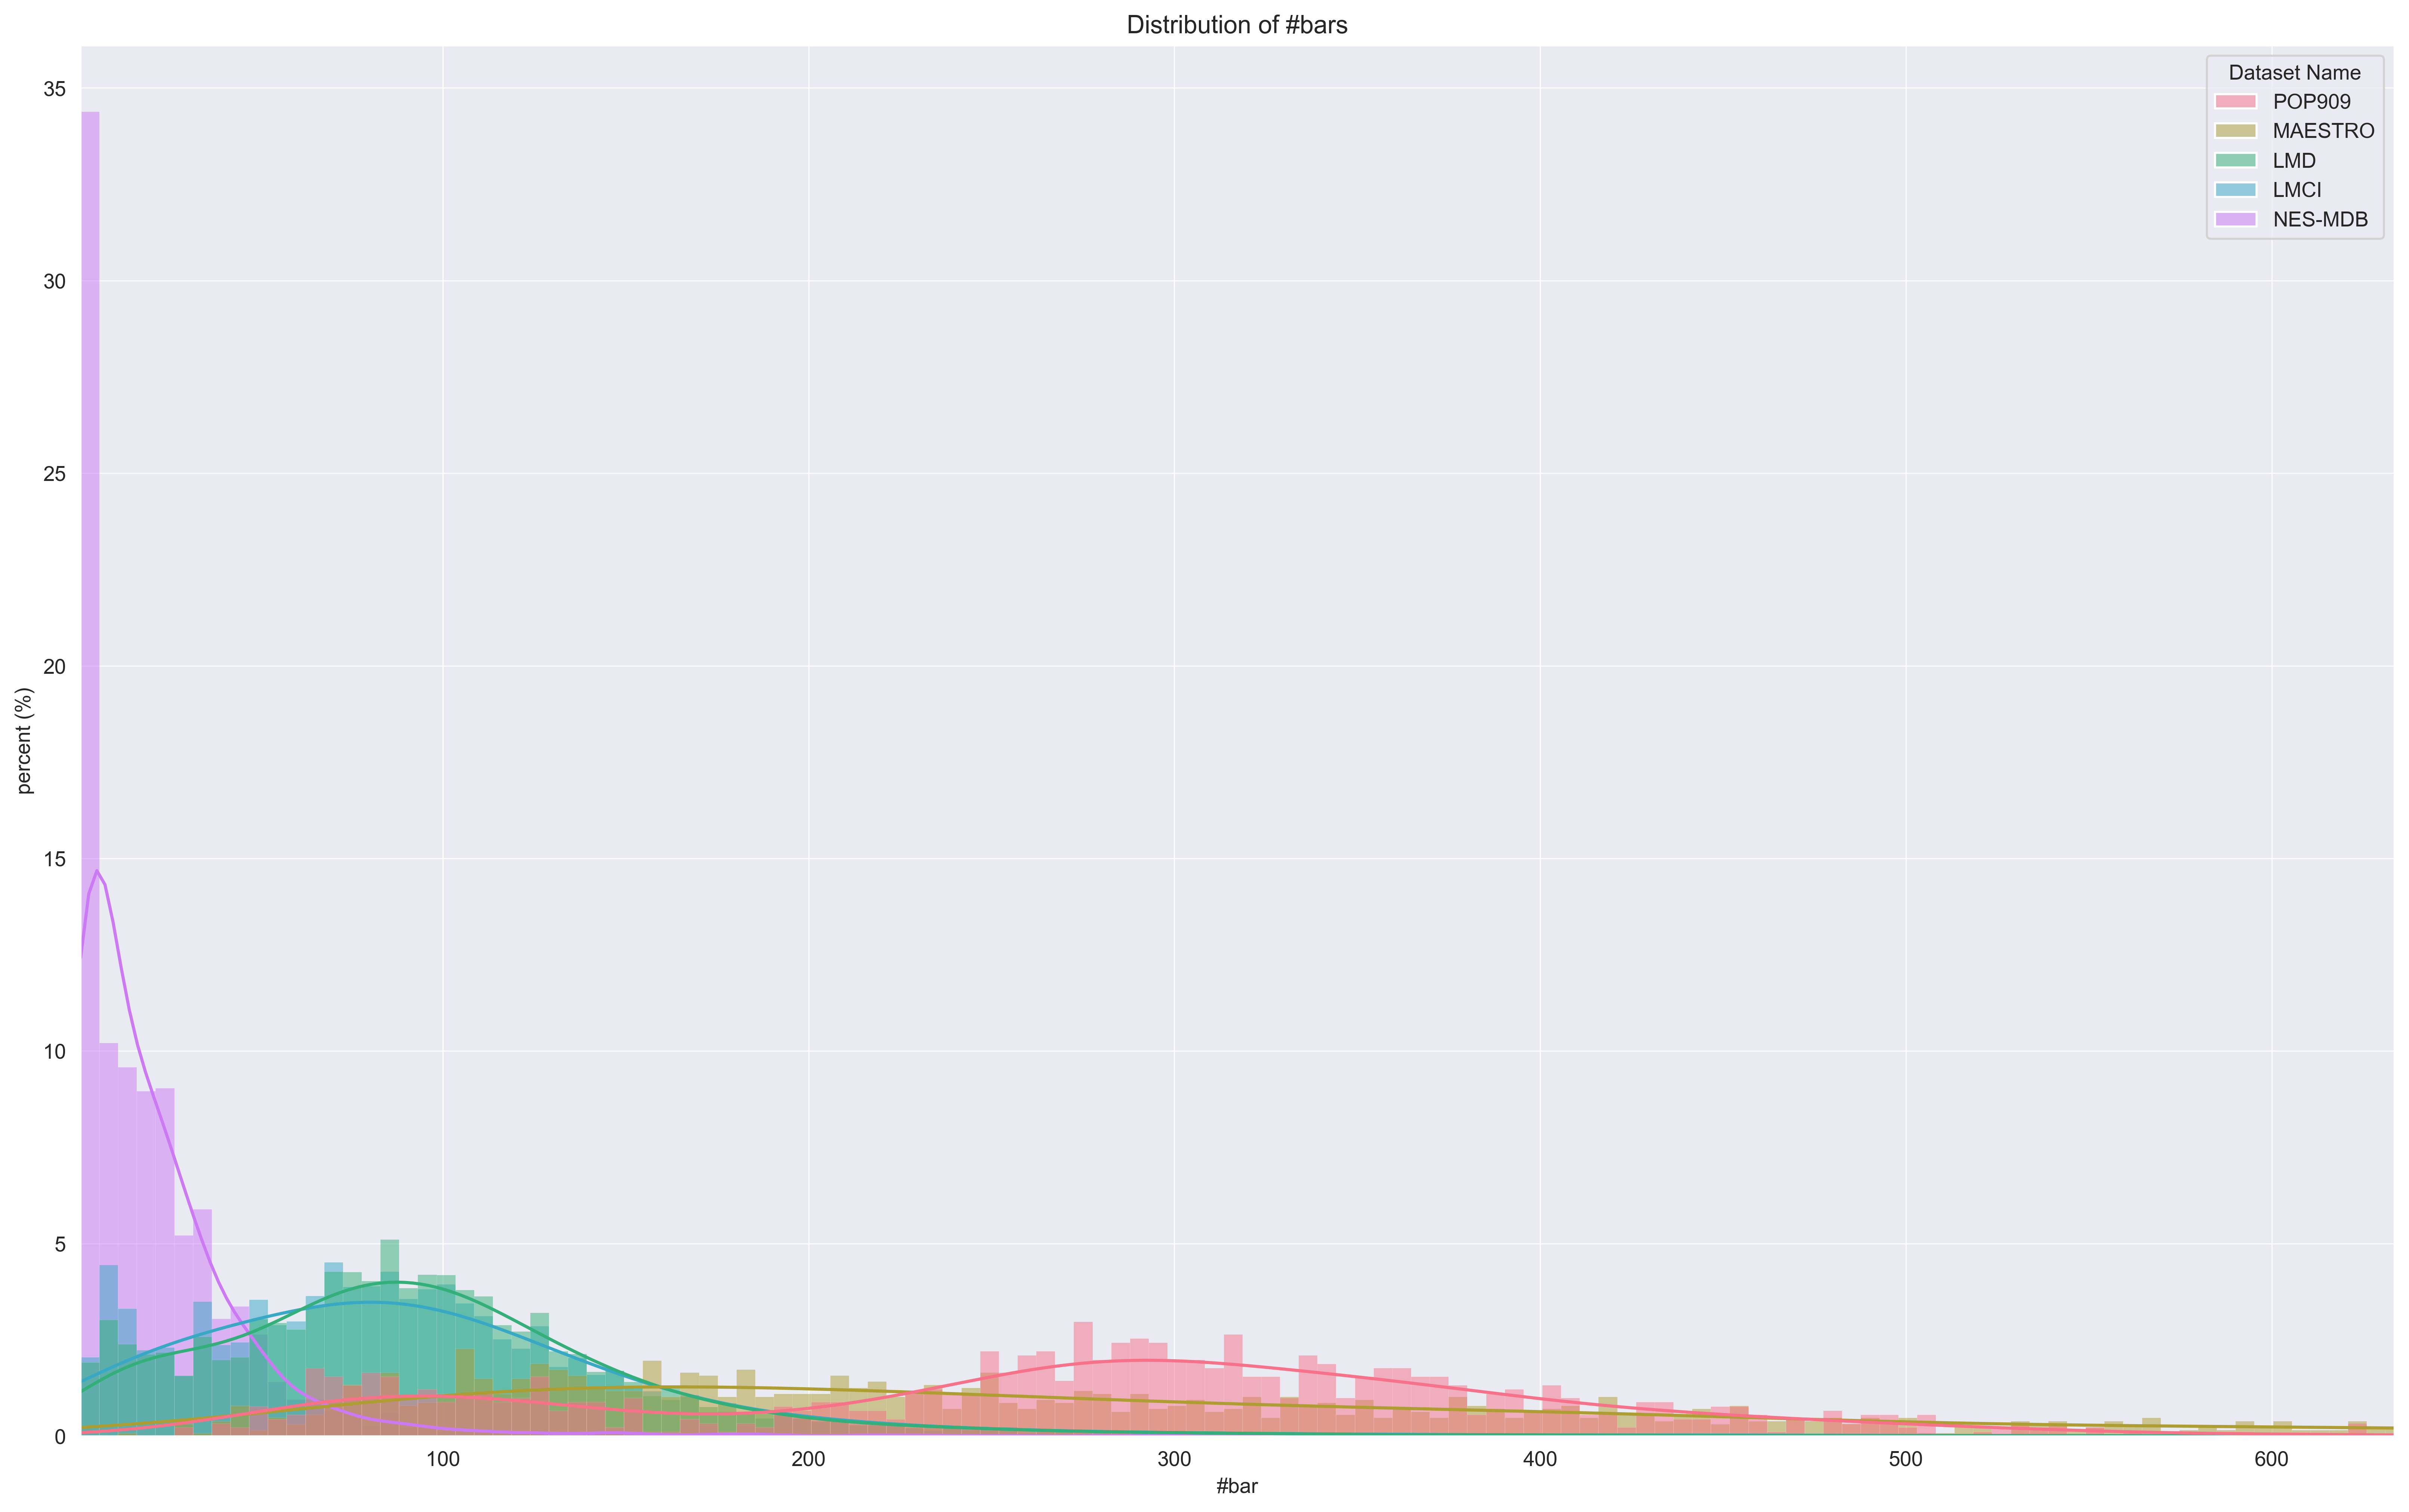

In [3]:
mv.song_duration_dist(**args)
mv.bar_count_dist(**args);



2023-04-25 20:17:33|[Music Visualizer]::time_sig_dist::music_visualize.py:415:INFO: Getting stats... 
2023-04-25 20:17:33|[Music Visualizer]::hist_wrapper::music_visualize.py:310:INFO: Plotting... 


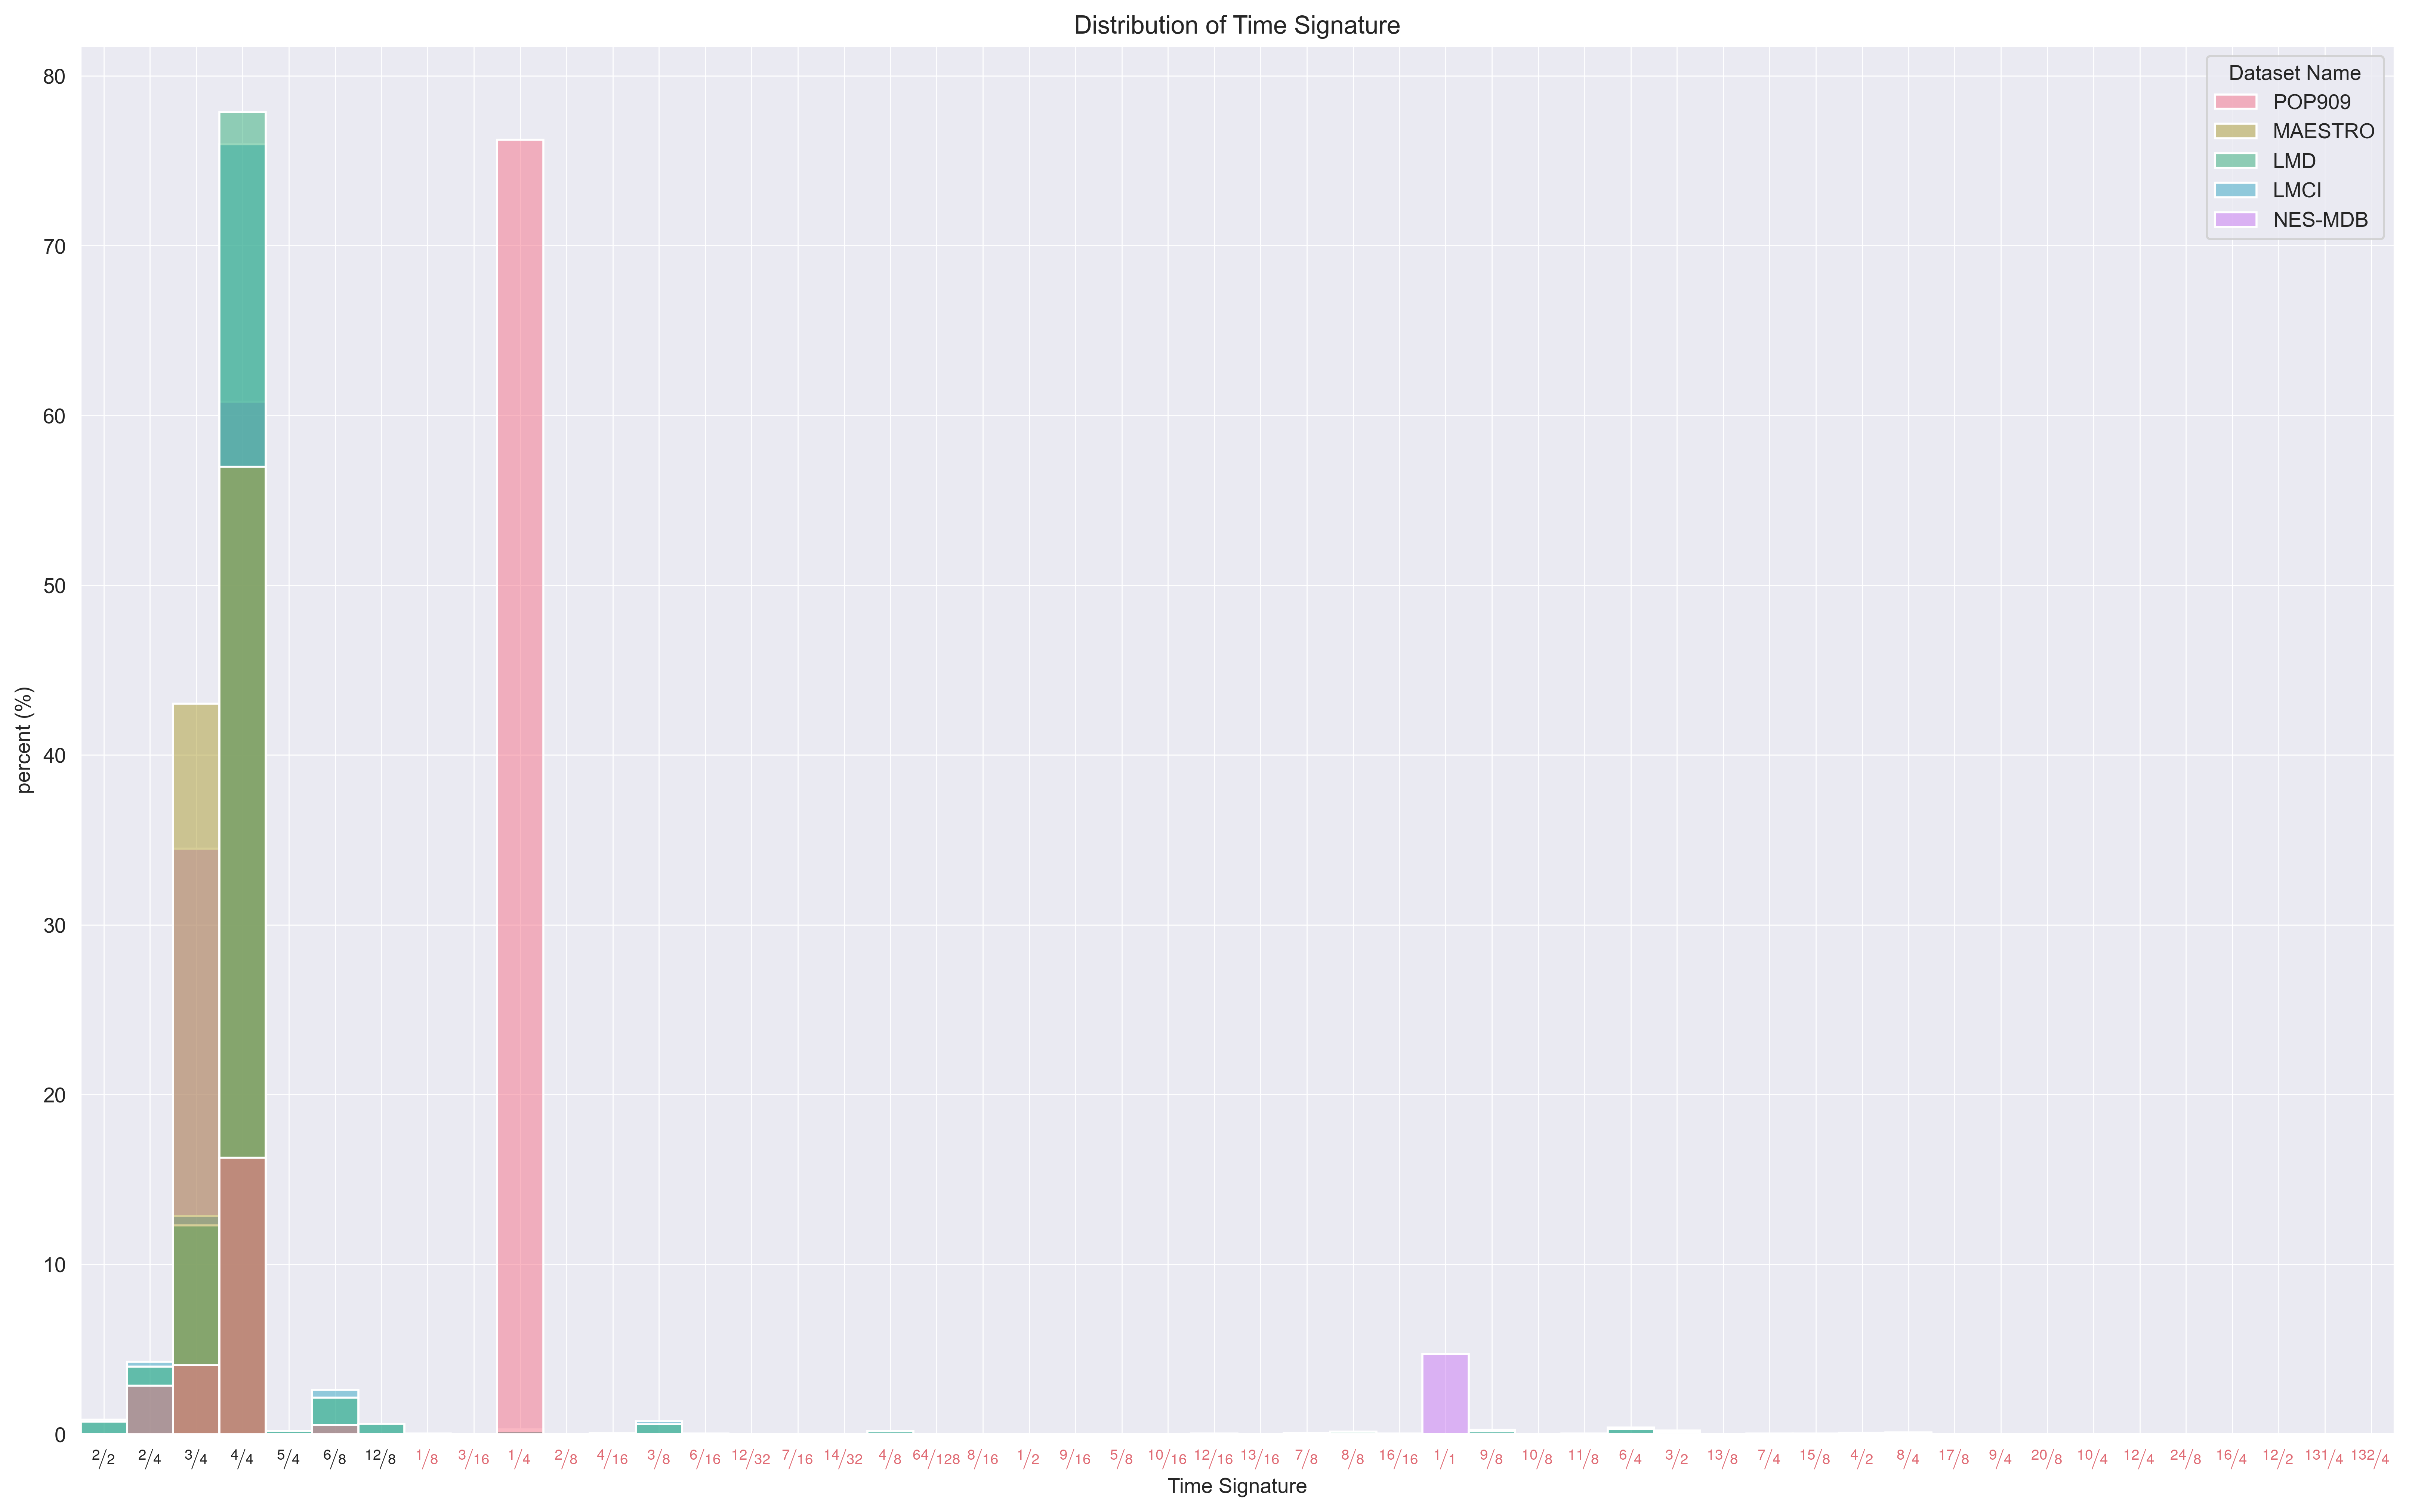

ic| mv.time_sig_dist(yscale='linear', stat='percent').df:     dataset_name time_sig_str  count
                                                          0           LMCI          2/2    108
                                                          1           LMCI          2/4    541
                                                          2           LMCI          3/4   1633
                                                          3           LMCI          4/4   9658
                                                          4           LMCI          5/4     23
                                                          5           LMCI          6/8    332
                                                          6           LMCI         12/8     77
                                                          7           LMCI          1/8      3
                                                          8           LMCI         3/16      1
                                                  

2023-04-25 20:17:54|[Music Visualizer]::hist_wrapper::music_visualize.py:310:INFO: Plotting... 


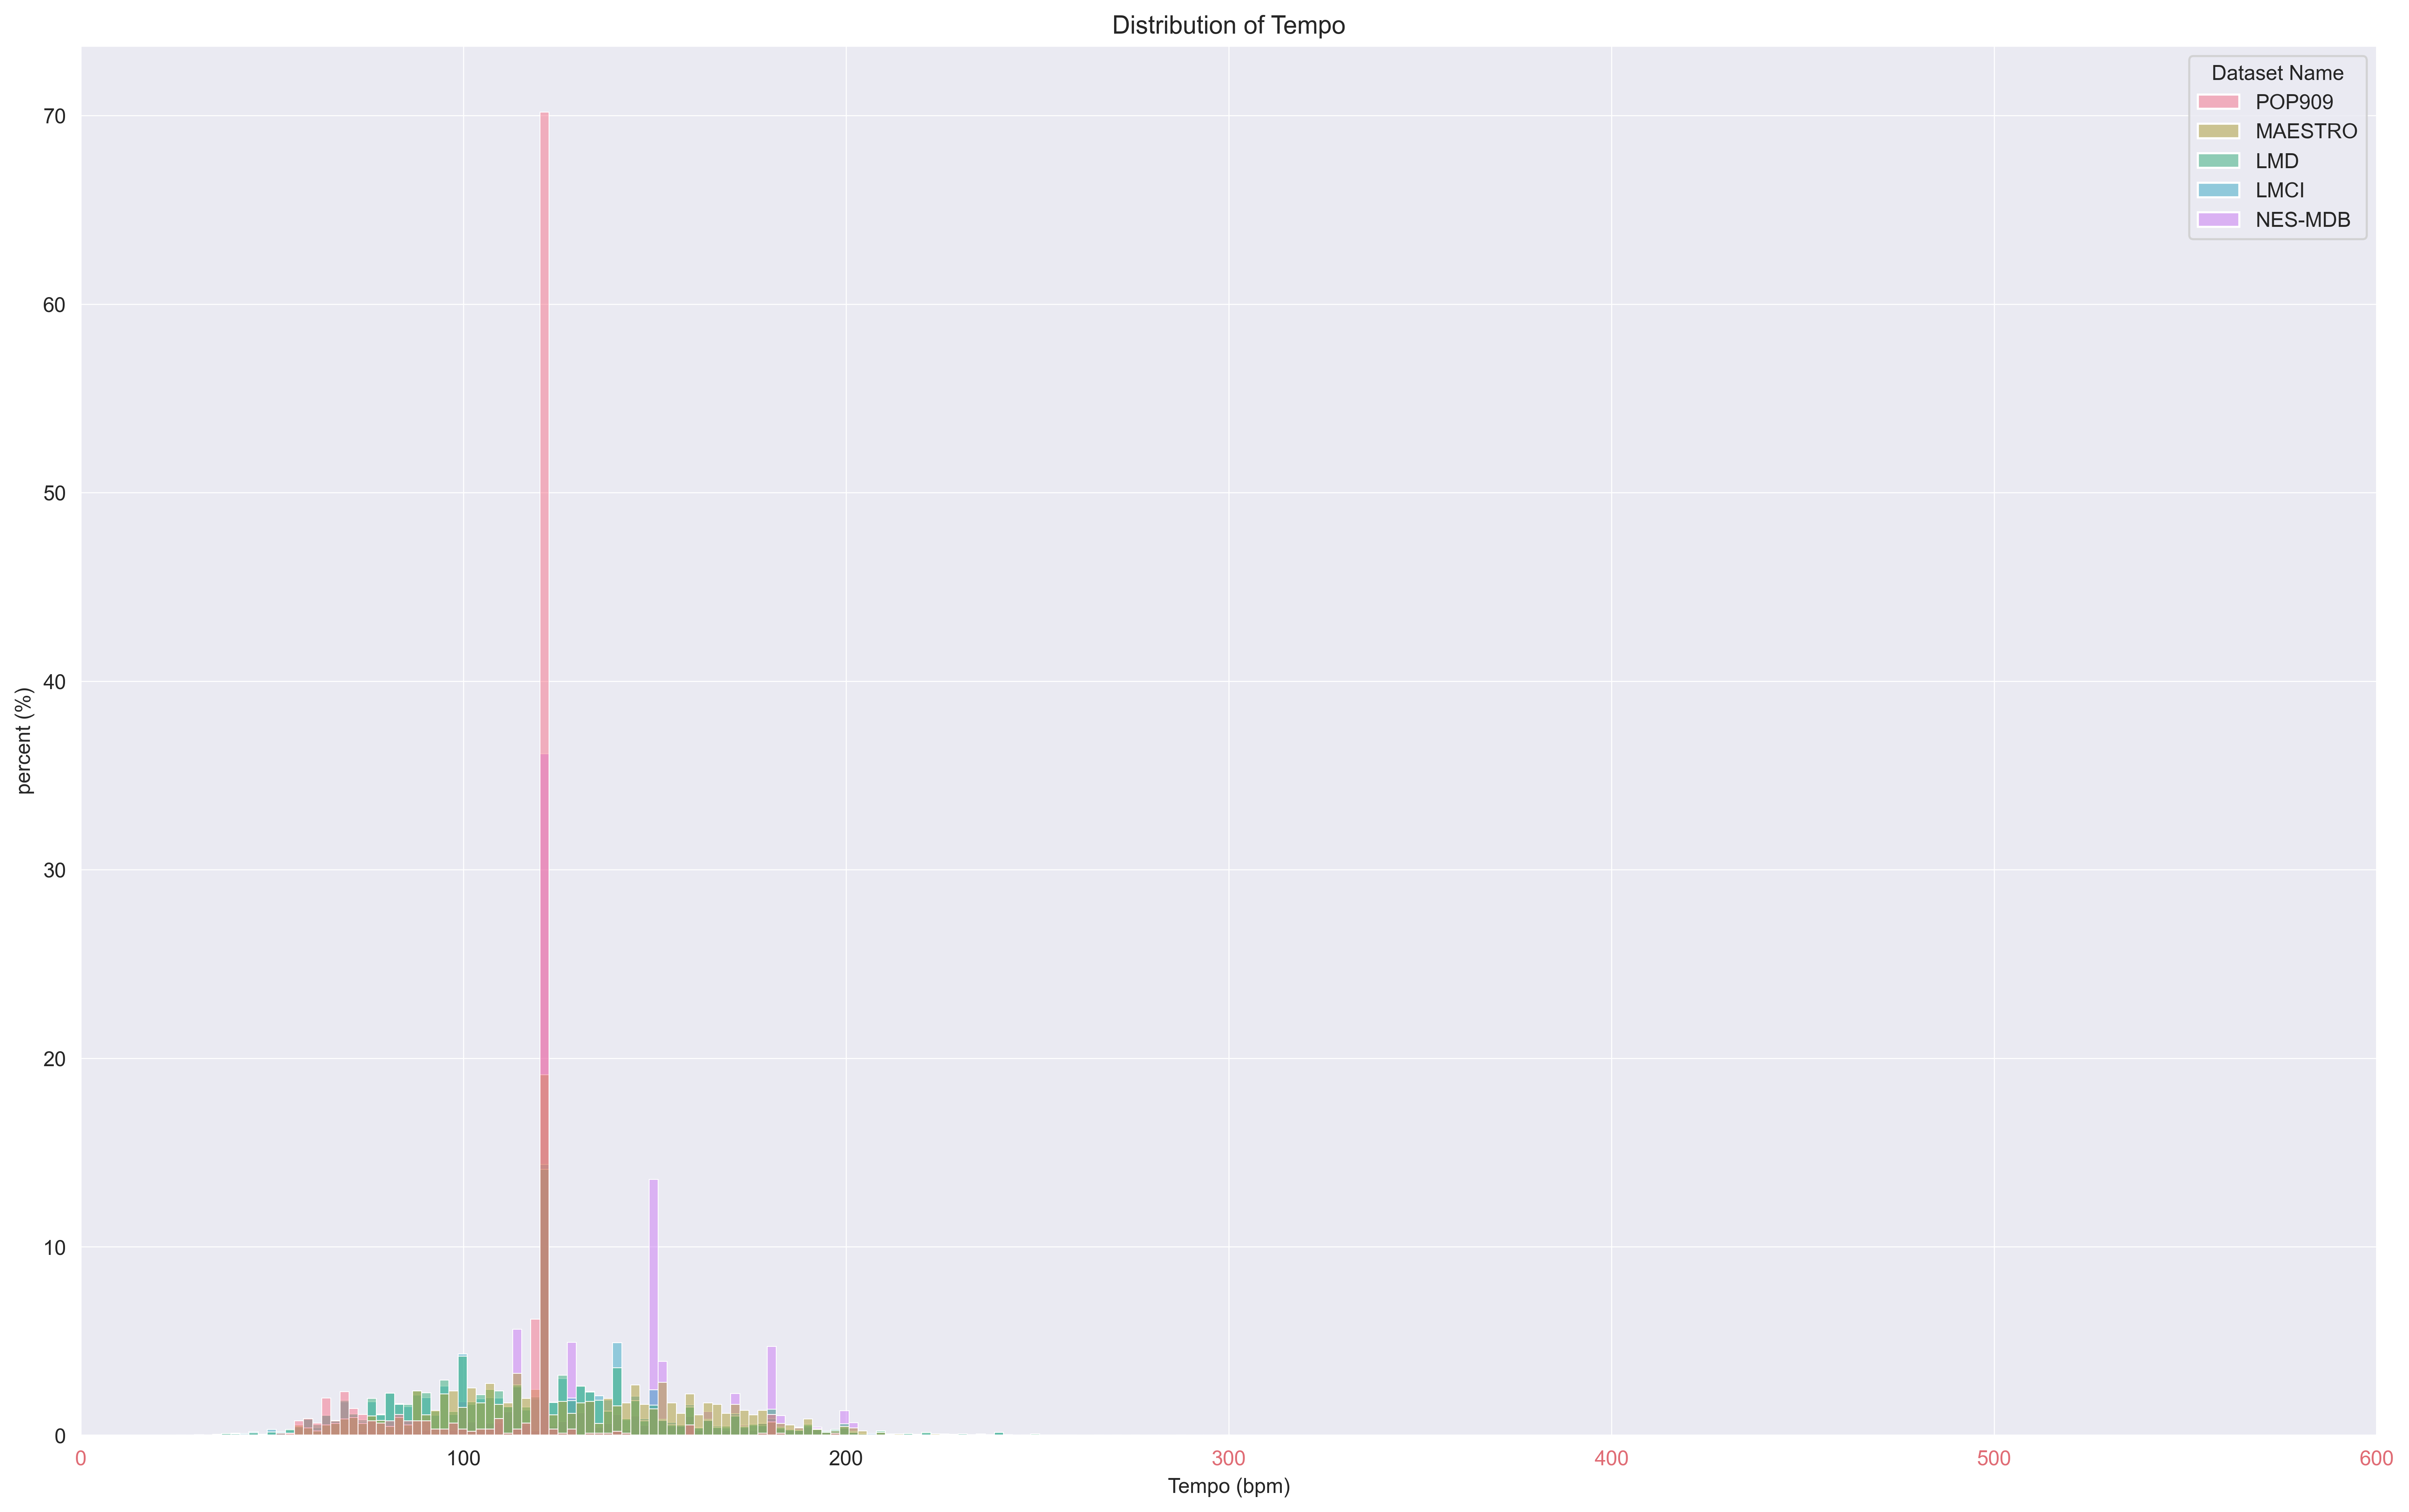

ic| mv.tempo_dist(stat='percent').df:     dataset_name  tempo  count
                                      0           LMCI     12      1
                                      1           LMCI     20      2
                                      2           LMCI     25      1
                                      3           LMCI     28      1
                                      4           LMCI     29      1
                                      5           LMCI     30      1
                                      6           LMCI     32      4
                                      7           LMCI     33      1
                                      8           LMCI     34      2
                                      9           LMCI     35      3
                                      10          LMCI     36      5
                                      11          LMCI     37      3
                                      12          LMCI     38      5
                                  

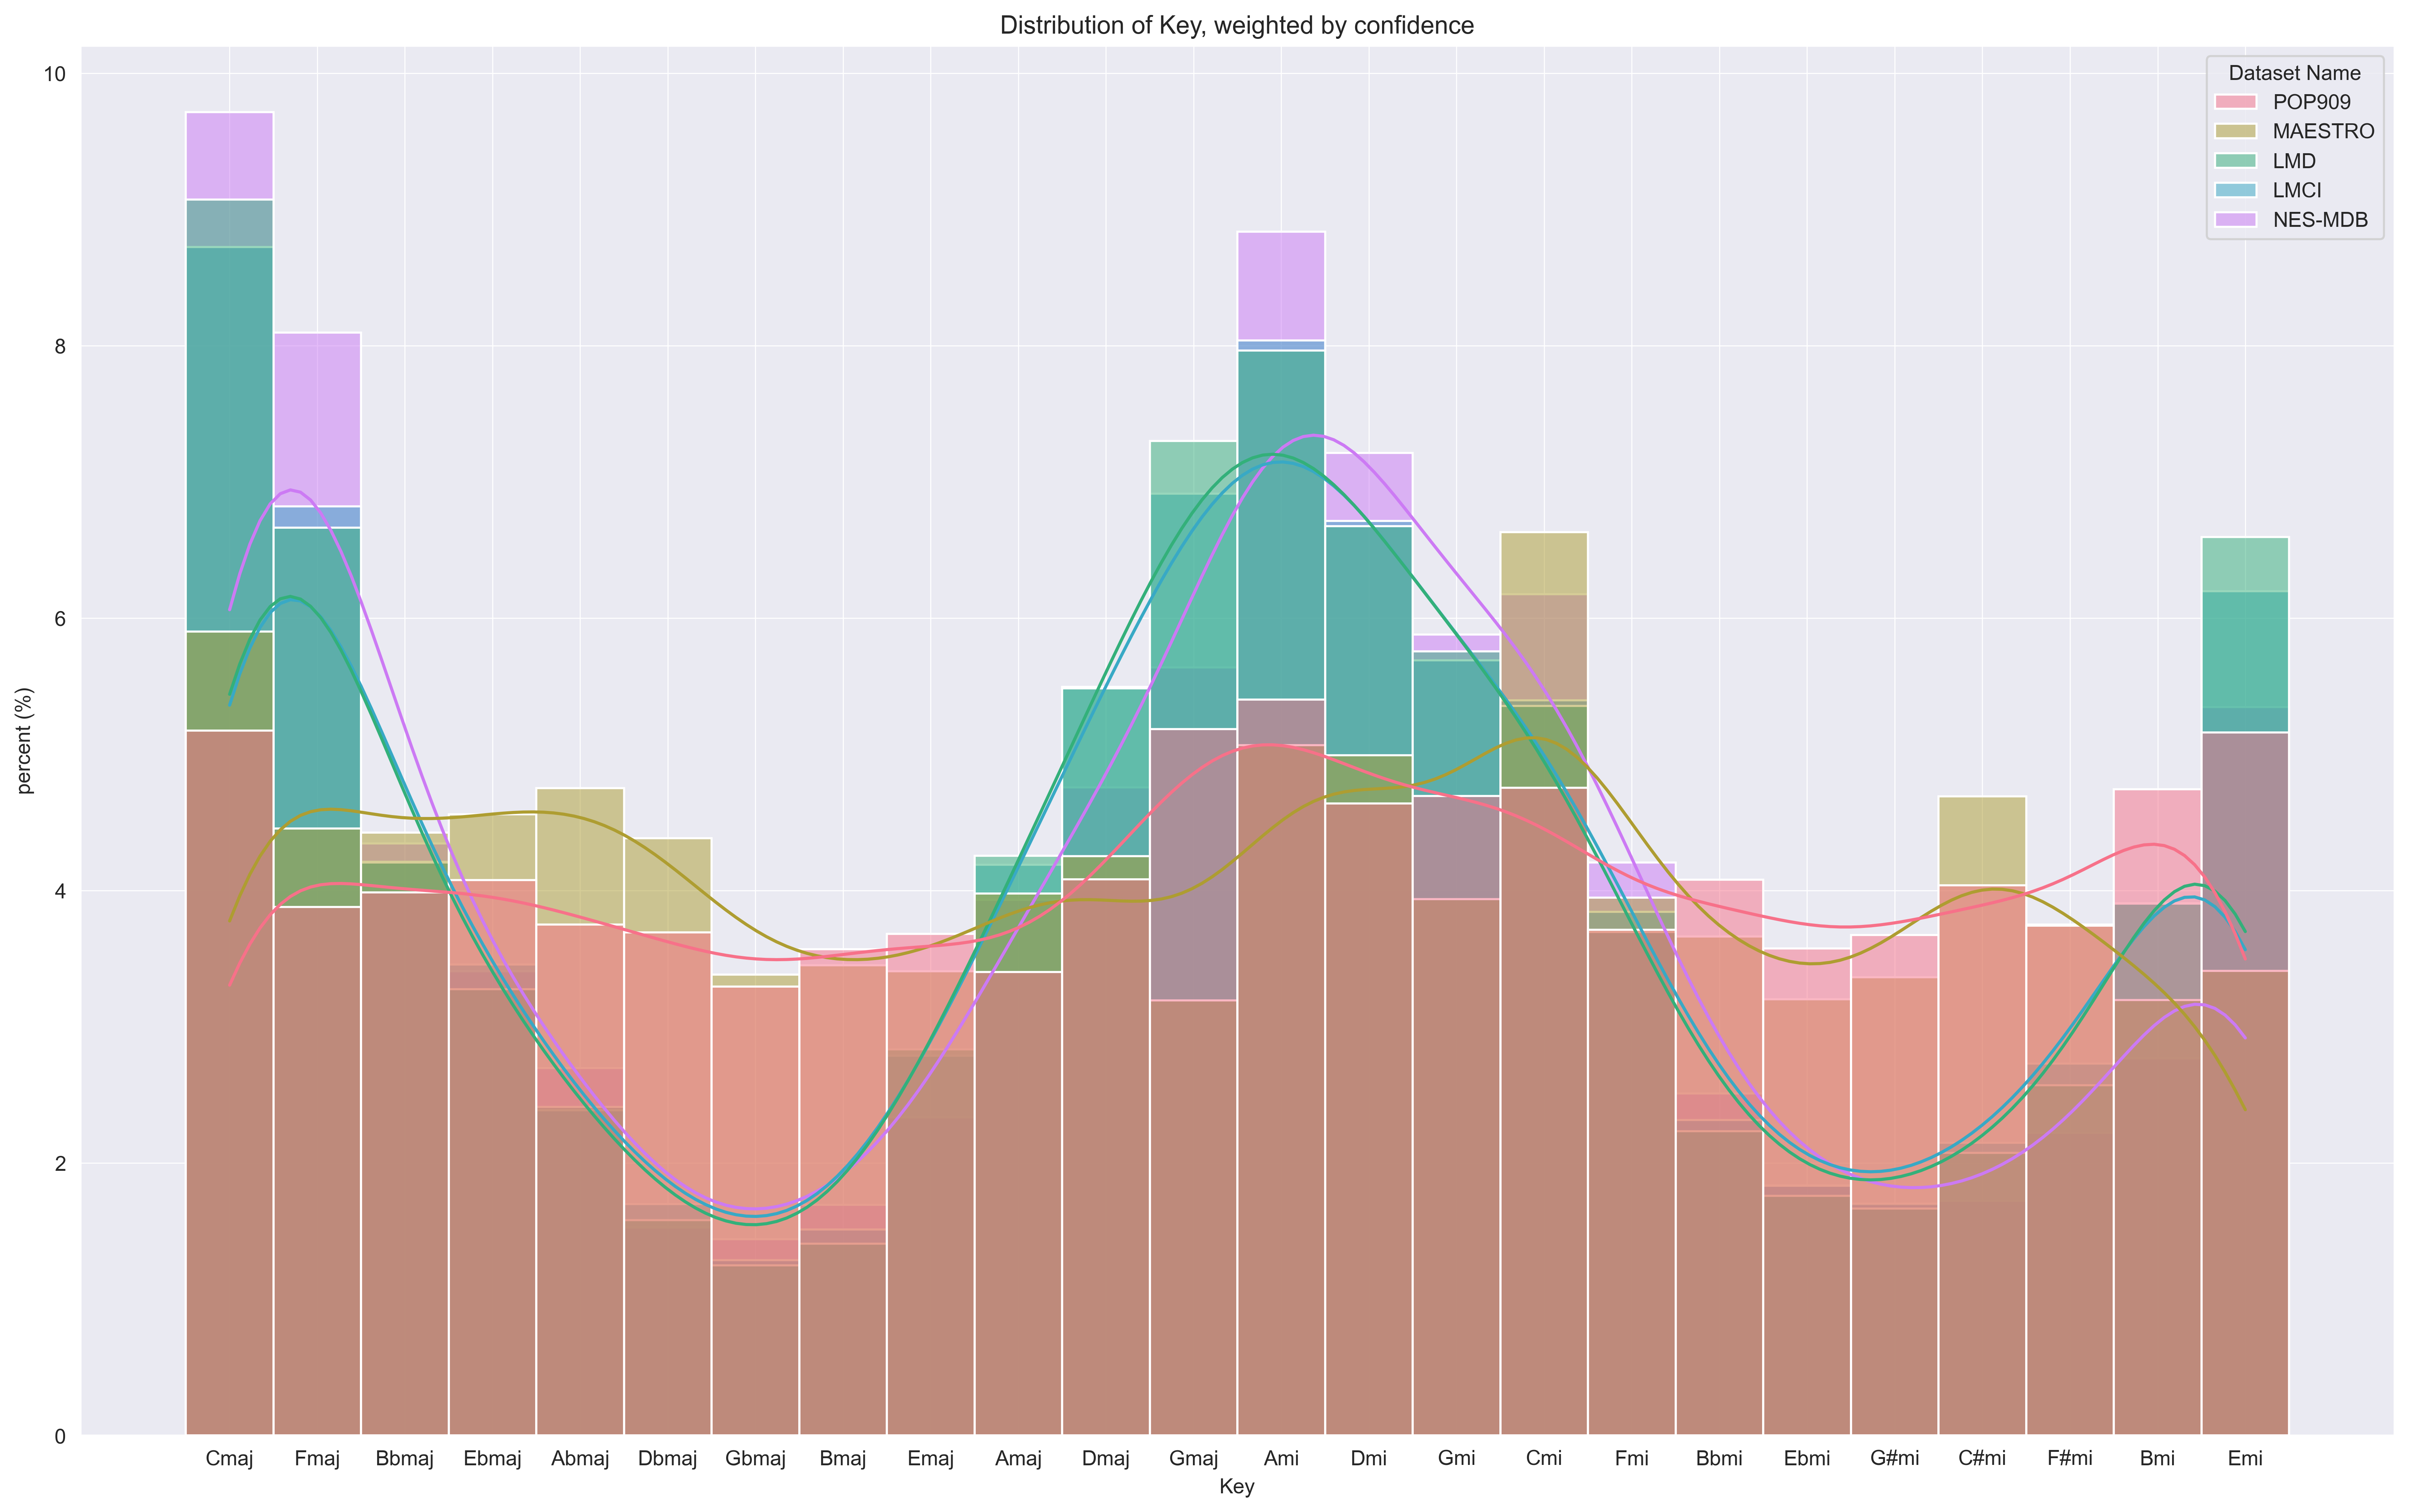

In [4]:
mic(mv.time_sig_dist(yscale='linear', stat='percent').df)
mic(mv.tempo_dist(stat='percent').df)
mv.key_dist(stat='percent');



2023-04-25 20:18:33|[Music Visualizer]::note_pitch_dist::music_visualize.py:526:INFO: Getting stats... 
2023-04-25 20:18:36|[Music Visualizer]::hist_wrapper::music_visualize.py:310:INFO: Plotting... 


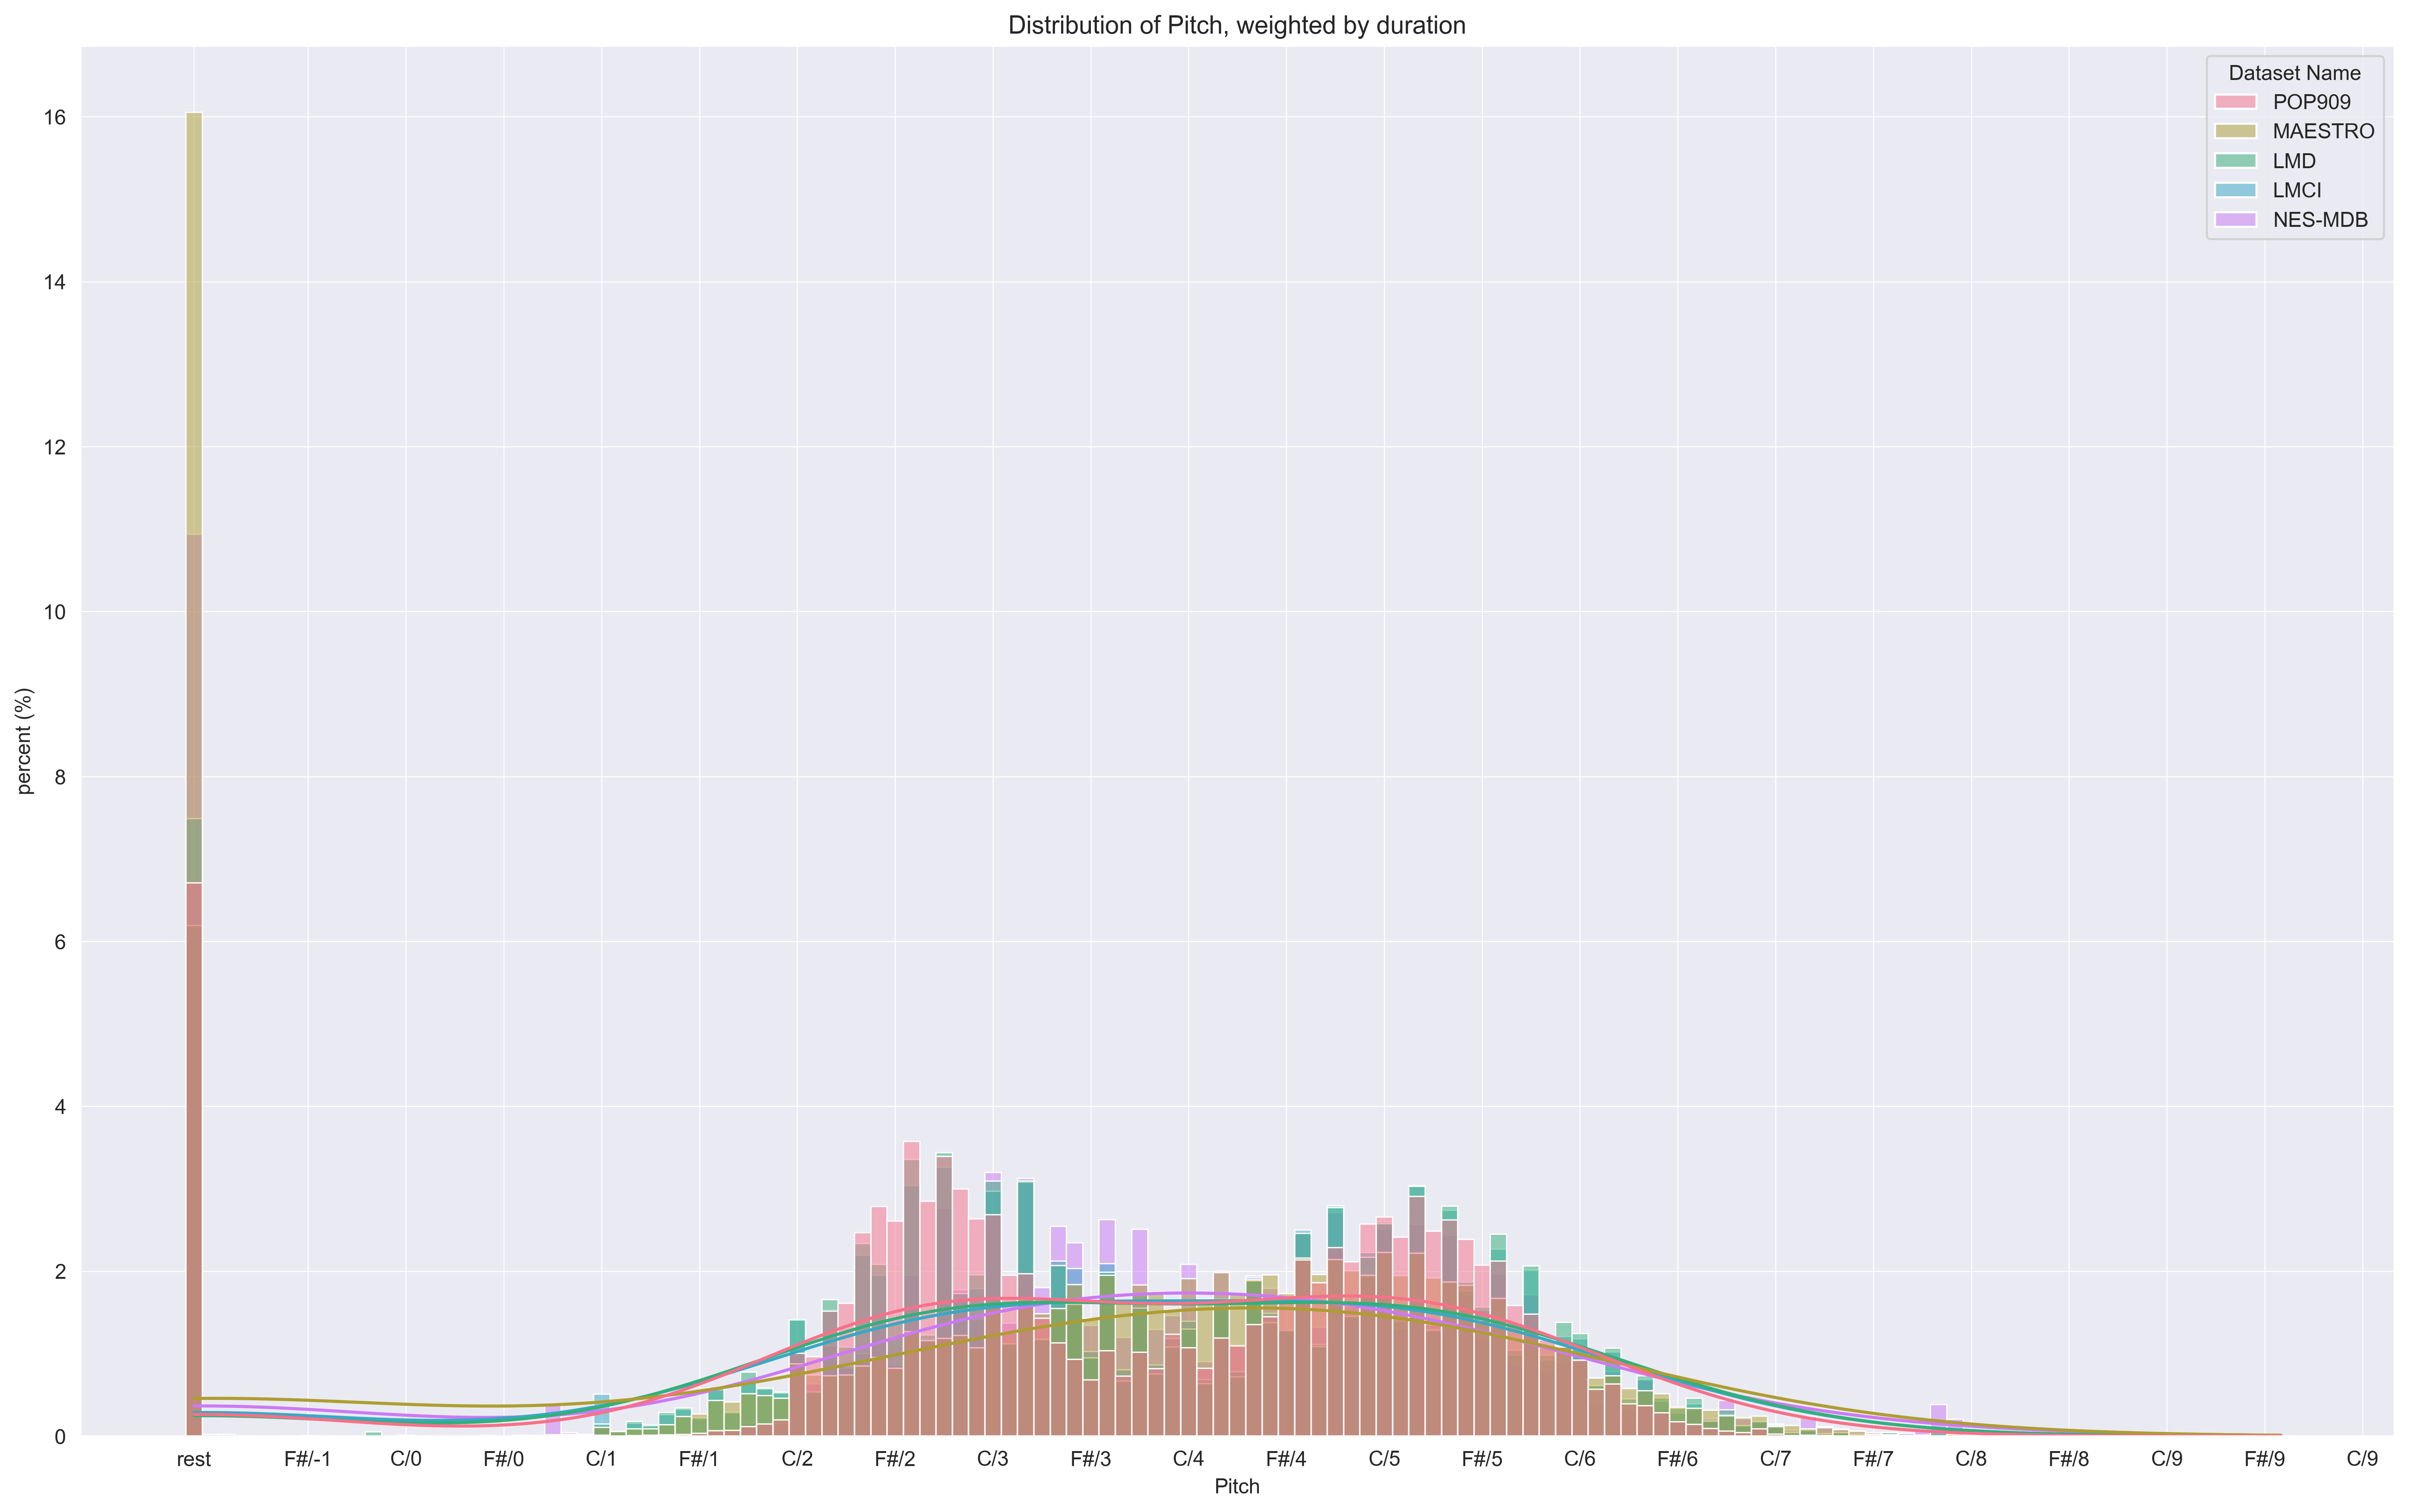

2023-04-25 20:18:40|[Music Visualizer]::note_duration_dist::music_visualize.py:554:INFO: Getting stats... 
2023-04-25 20:18:41|[Music Visualizer]::hist_wrapper::music_visualize.py:310:INFO: Plotting... 


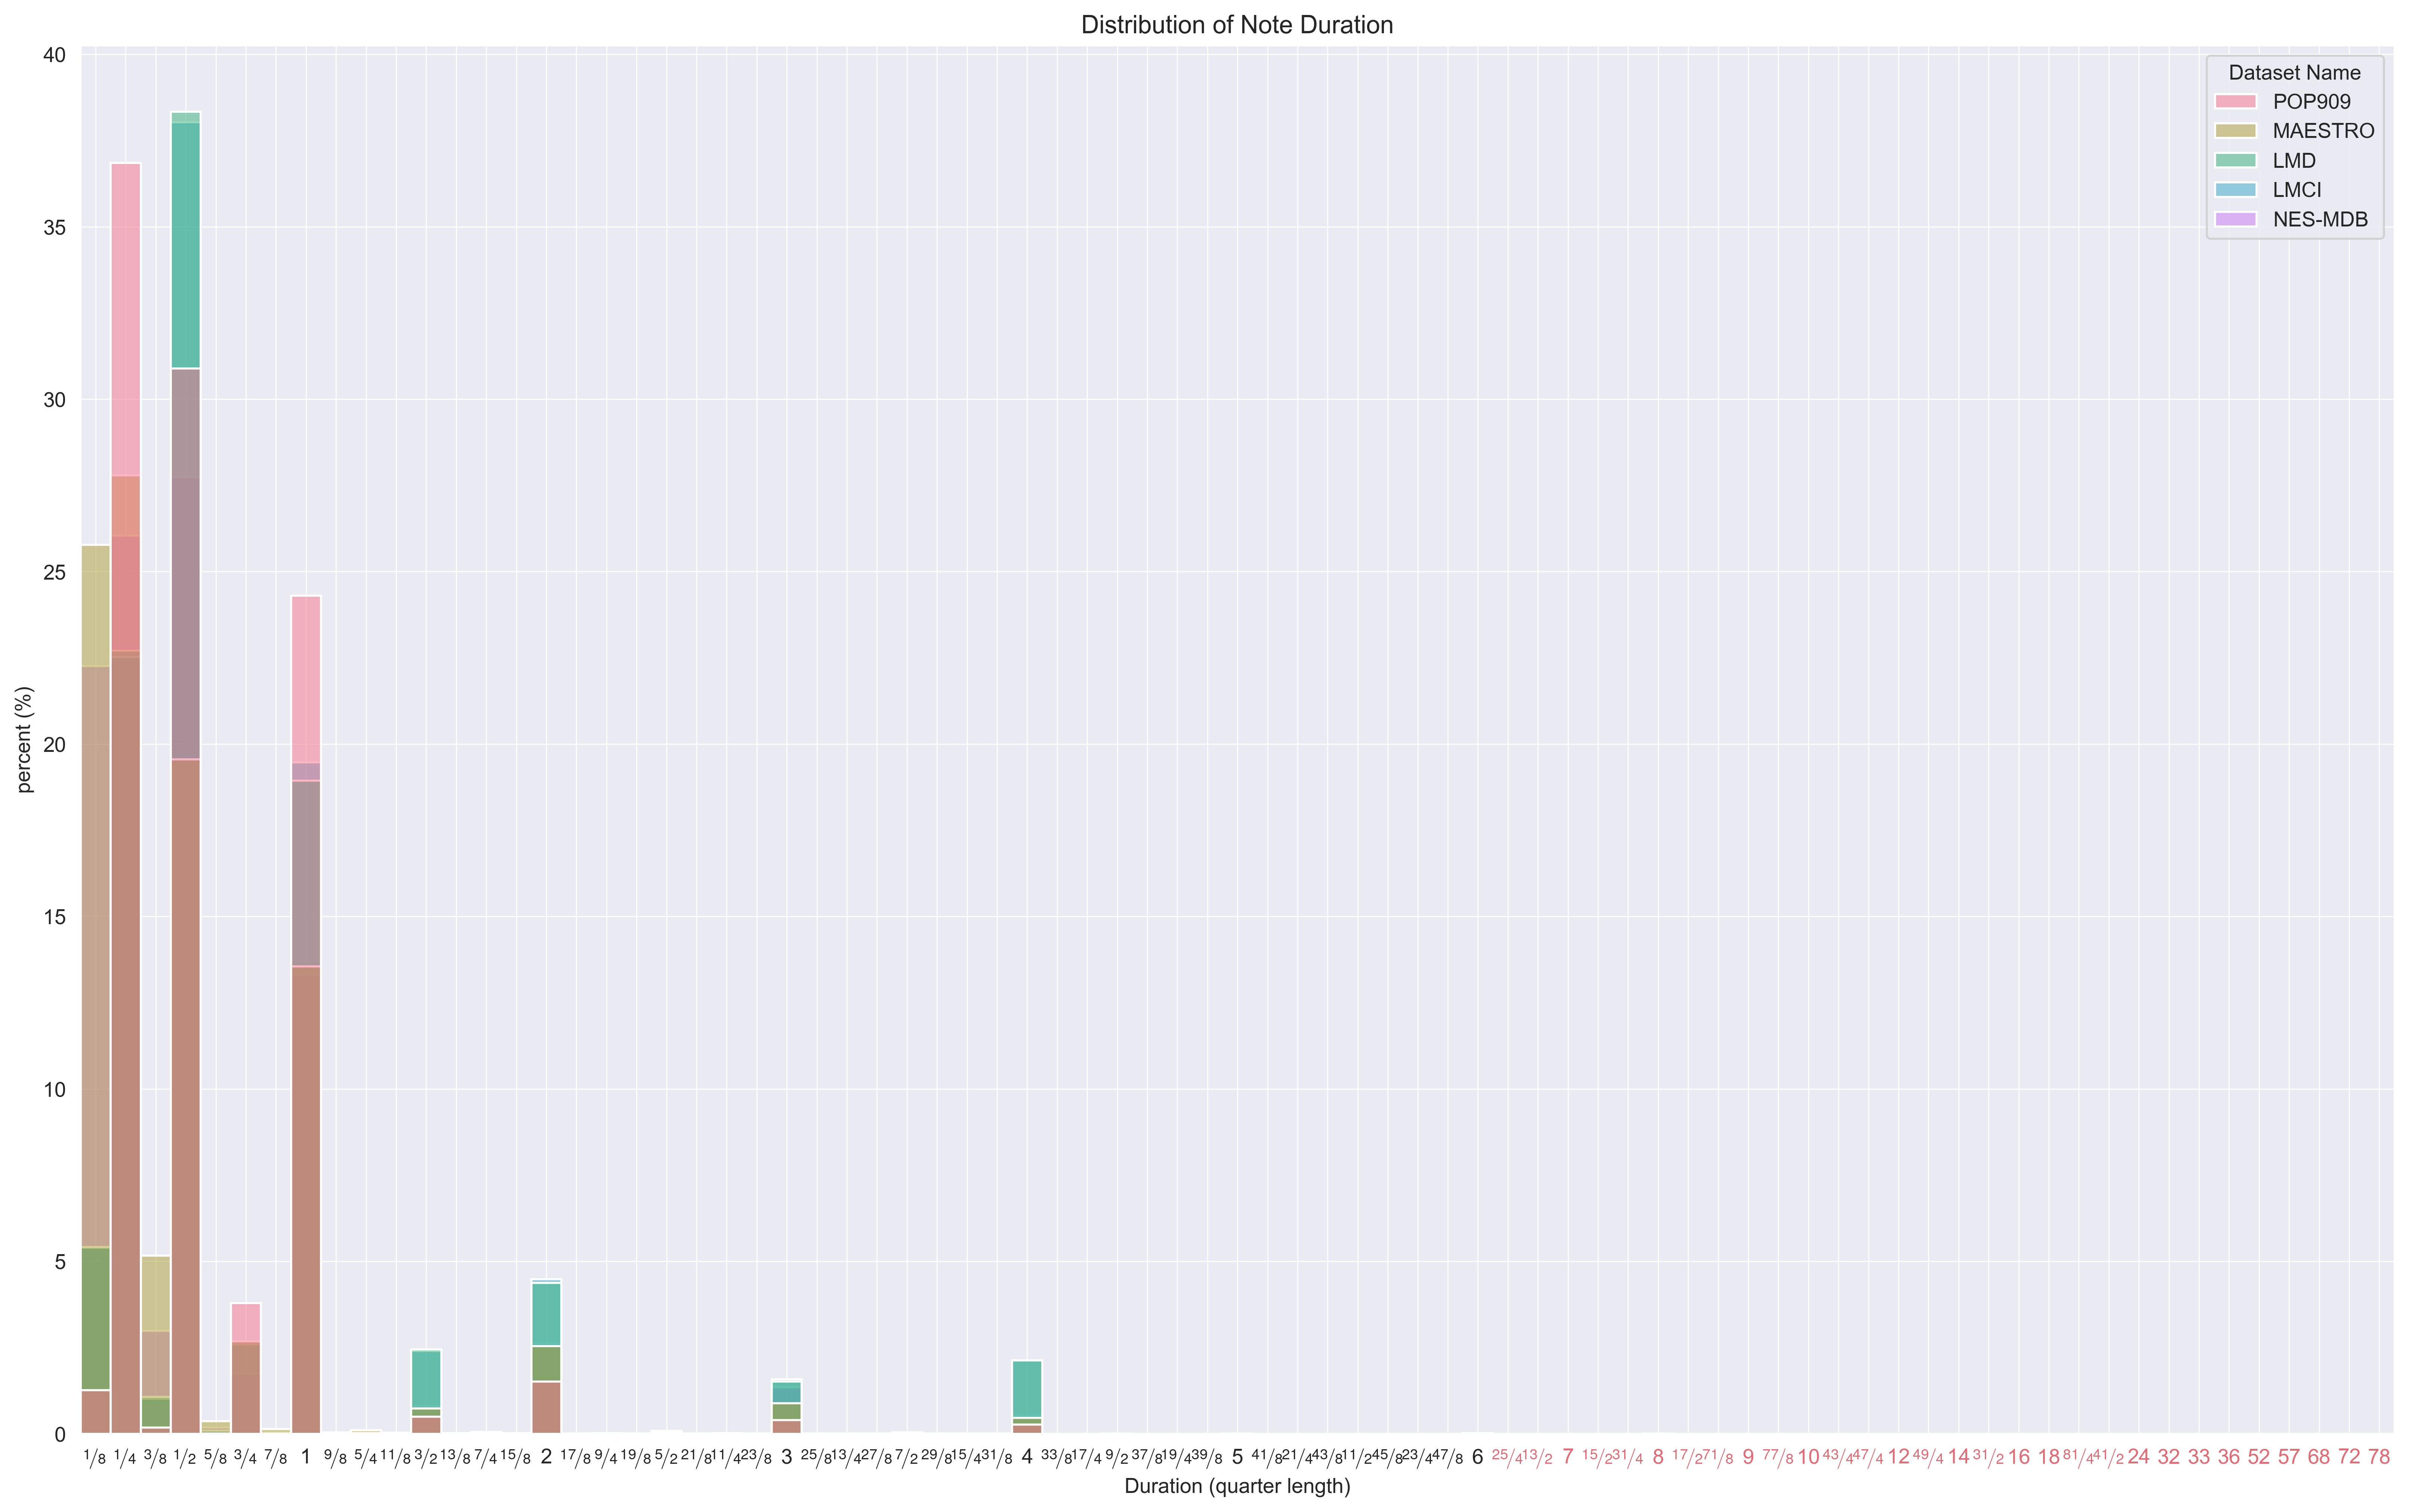

ic| mv.note_duration_dist(note_type='all', stat='percent').df:     duration    count dataset_name
                                                               0          1   253146       POP909
                                                               1        1/2   321805       POP909
                                                               2        1/4   383834       POP909
                                                               3        1/8    13128       POP909
                                                               4        3/4    39415       POP909
                                                               5        3/8     1921       POP909
                                                               6          2    15766       POP909
                                                               7        3/2     5162       POP909
                                                               8          3     4086       POP909
                    

2023-04-25 20:19:01|[Music Visualizer]::note_duration_dist::music_visualize.py:554:INFO: Getting stats... 
2023-04-25 20:19:01|[Music Visualizer]::hist_wrapper::music_visualize.py:310:INFO: Plotting... 


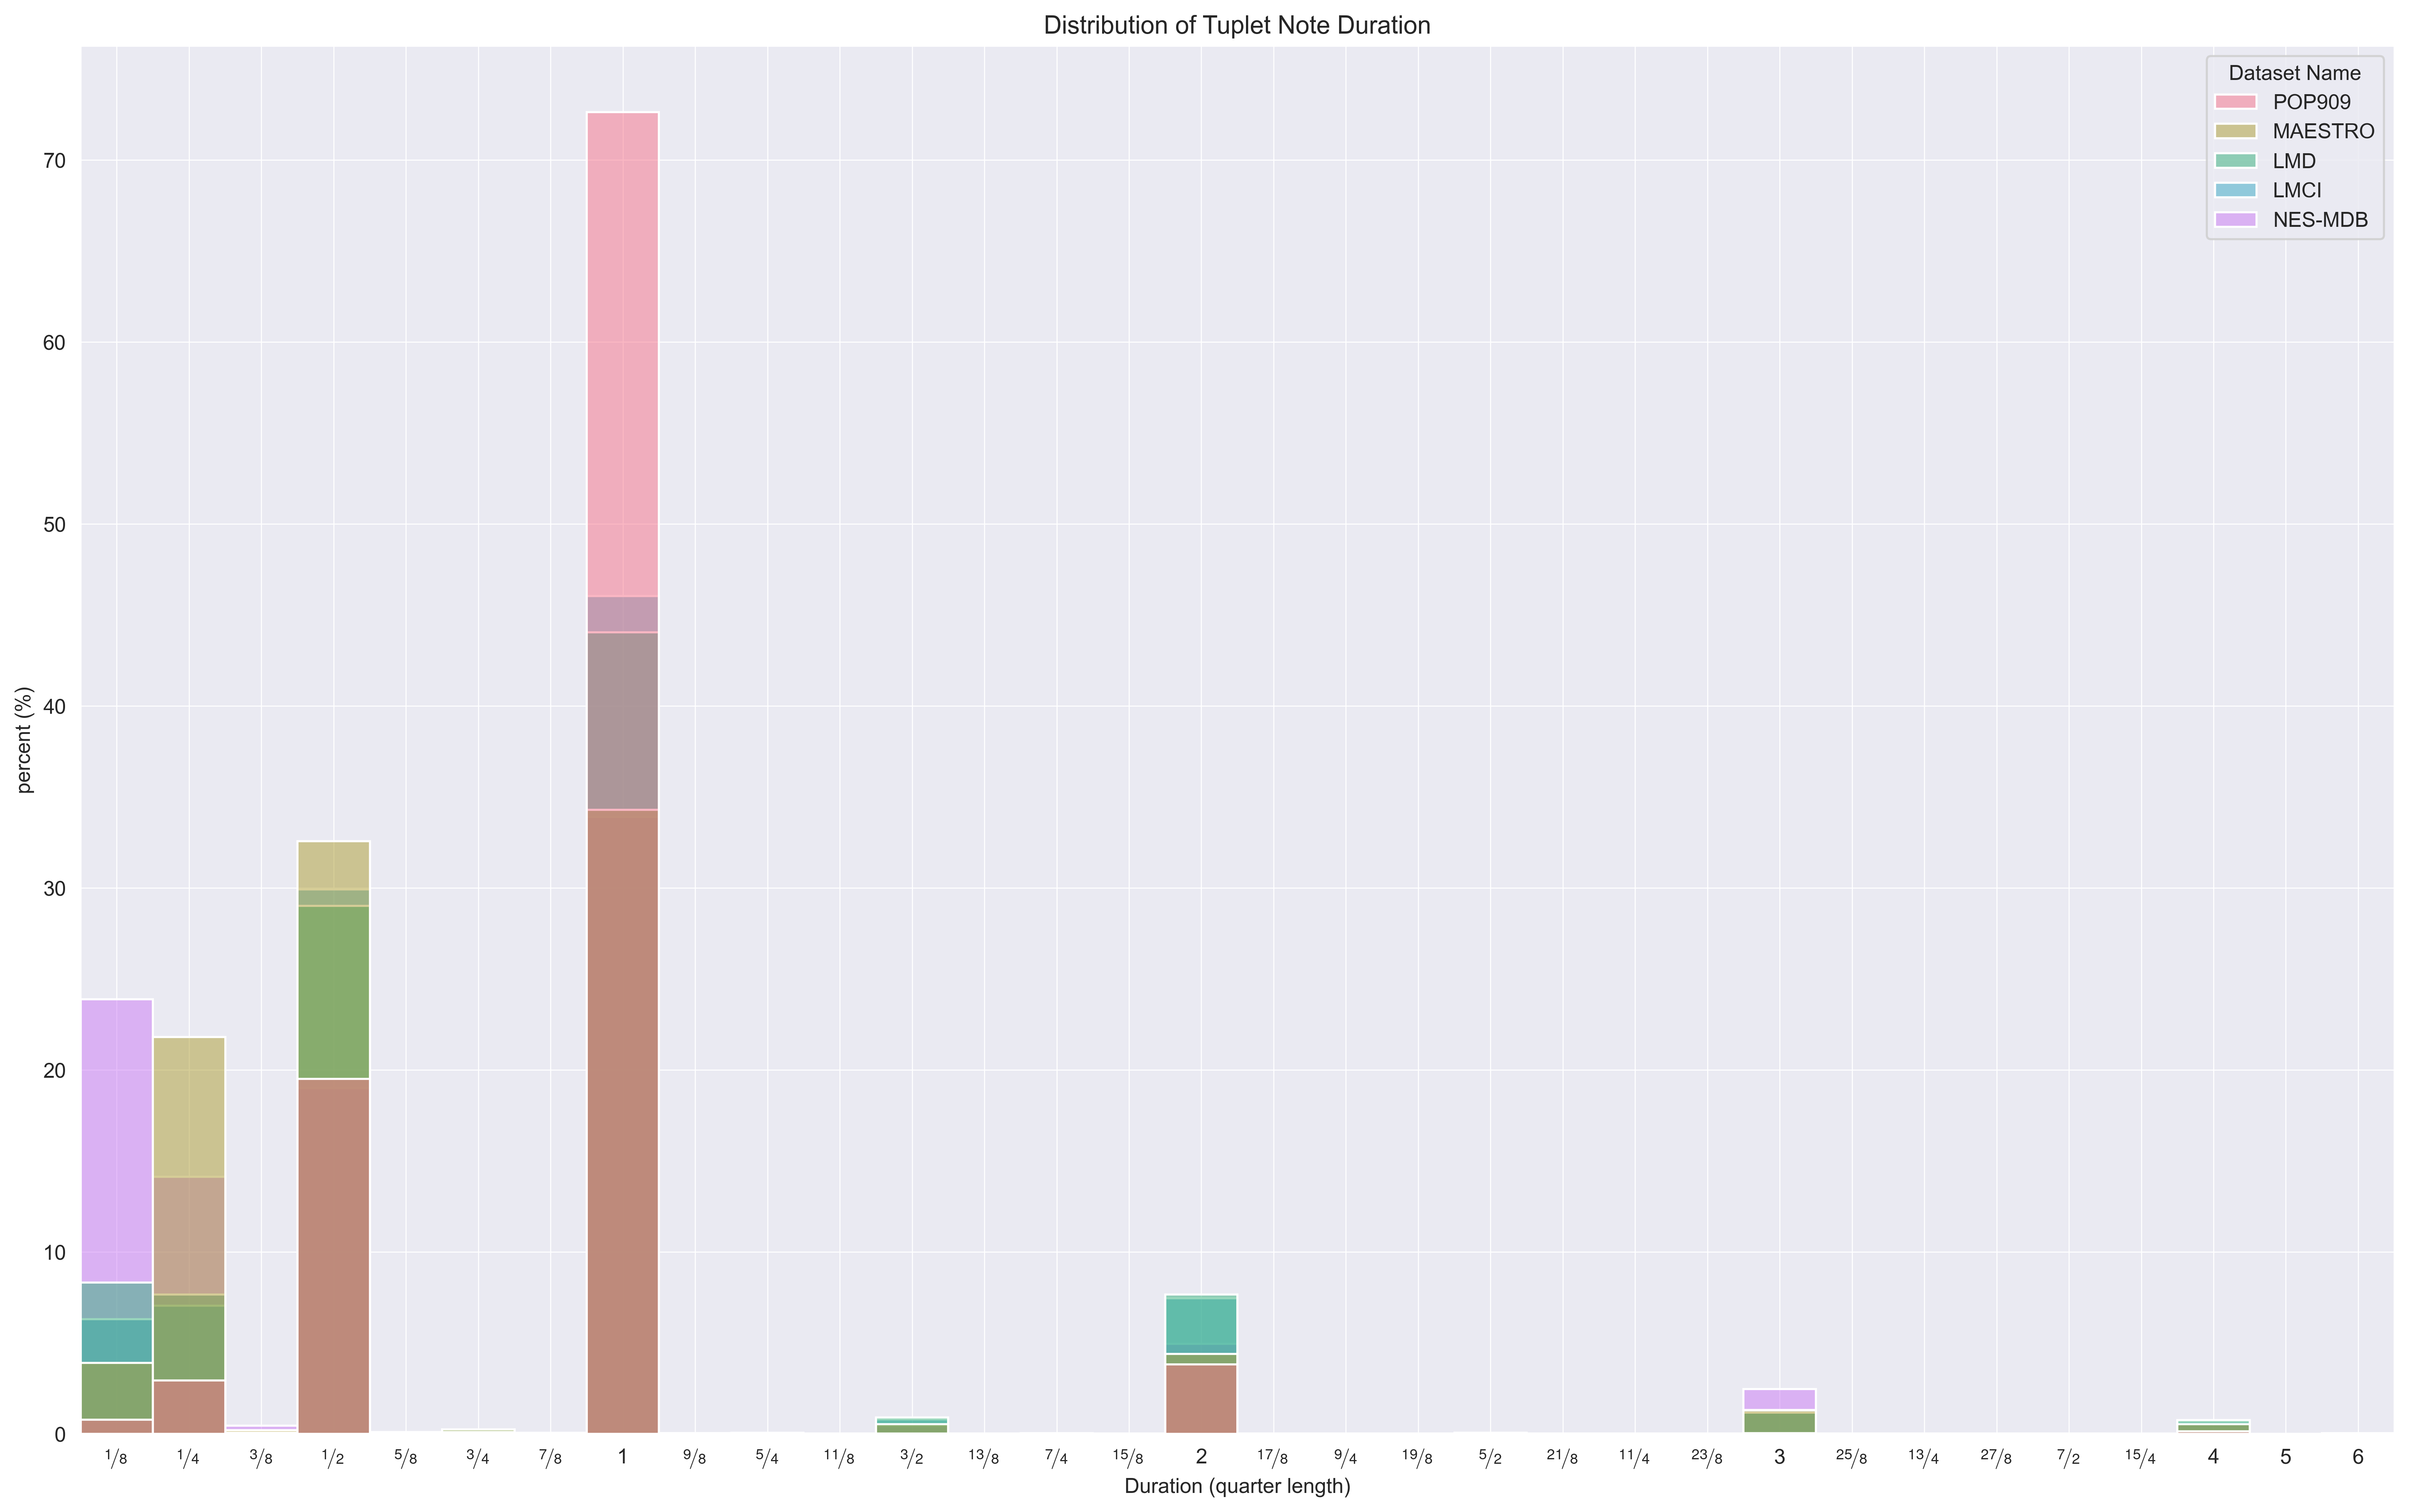

ic| mv.note_duration_dist(note_type='tuplet', stat='percent').df:     duration   count dataset_name
                                                                  0          1    3975       POP909
                                                                  1        1/2    1067       POP909
                                                                  2          2     208       POP909
                                                                  3        1/8      42       POP909
                                                                  4        1/4     160       POP909
                                                                  5        5/8       1       POP909
                                                                  6        3/8       3       POP909
                                                                  7          3       2       POP909
                                                                  8        3/4       5       POP909


In [5]:
mv.note_pitch_dist(stat='percent')
mic(mv.note_duration_dist(note_type='all', stat='percent').df)
mic(mv.note_duration_dist(note_type='tuplet', stat='percent').df);



2023-04-25 20:20:22|[Music Visualizer]::hist_wrapper::music_visualize.py:310:INFO: Plotting... 


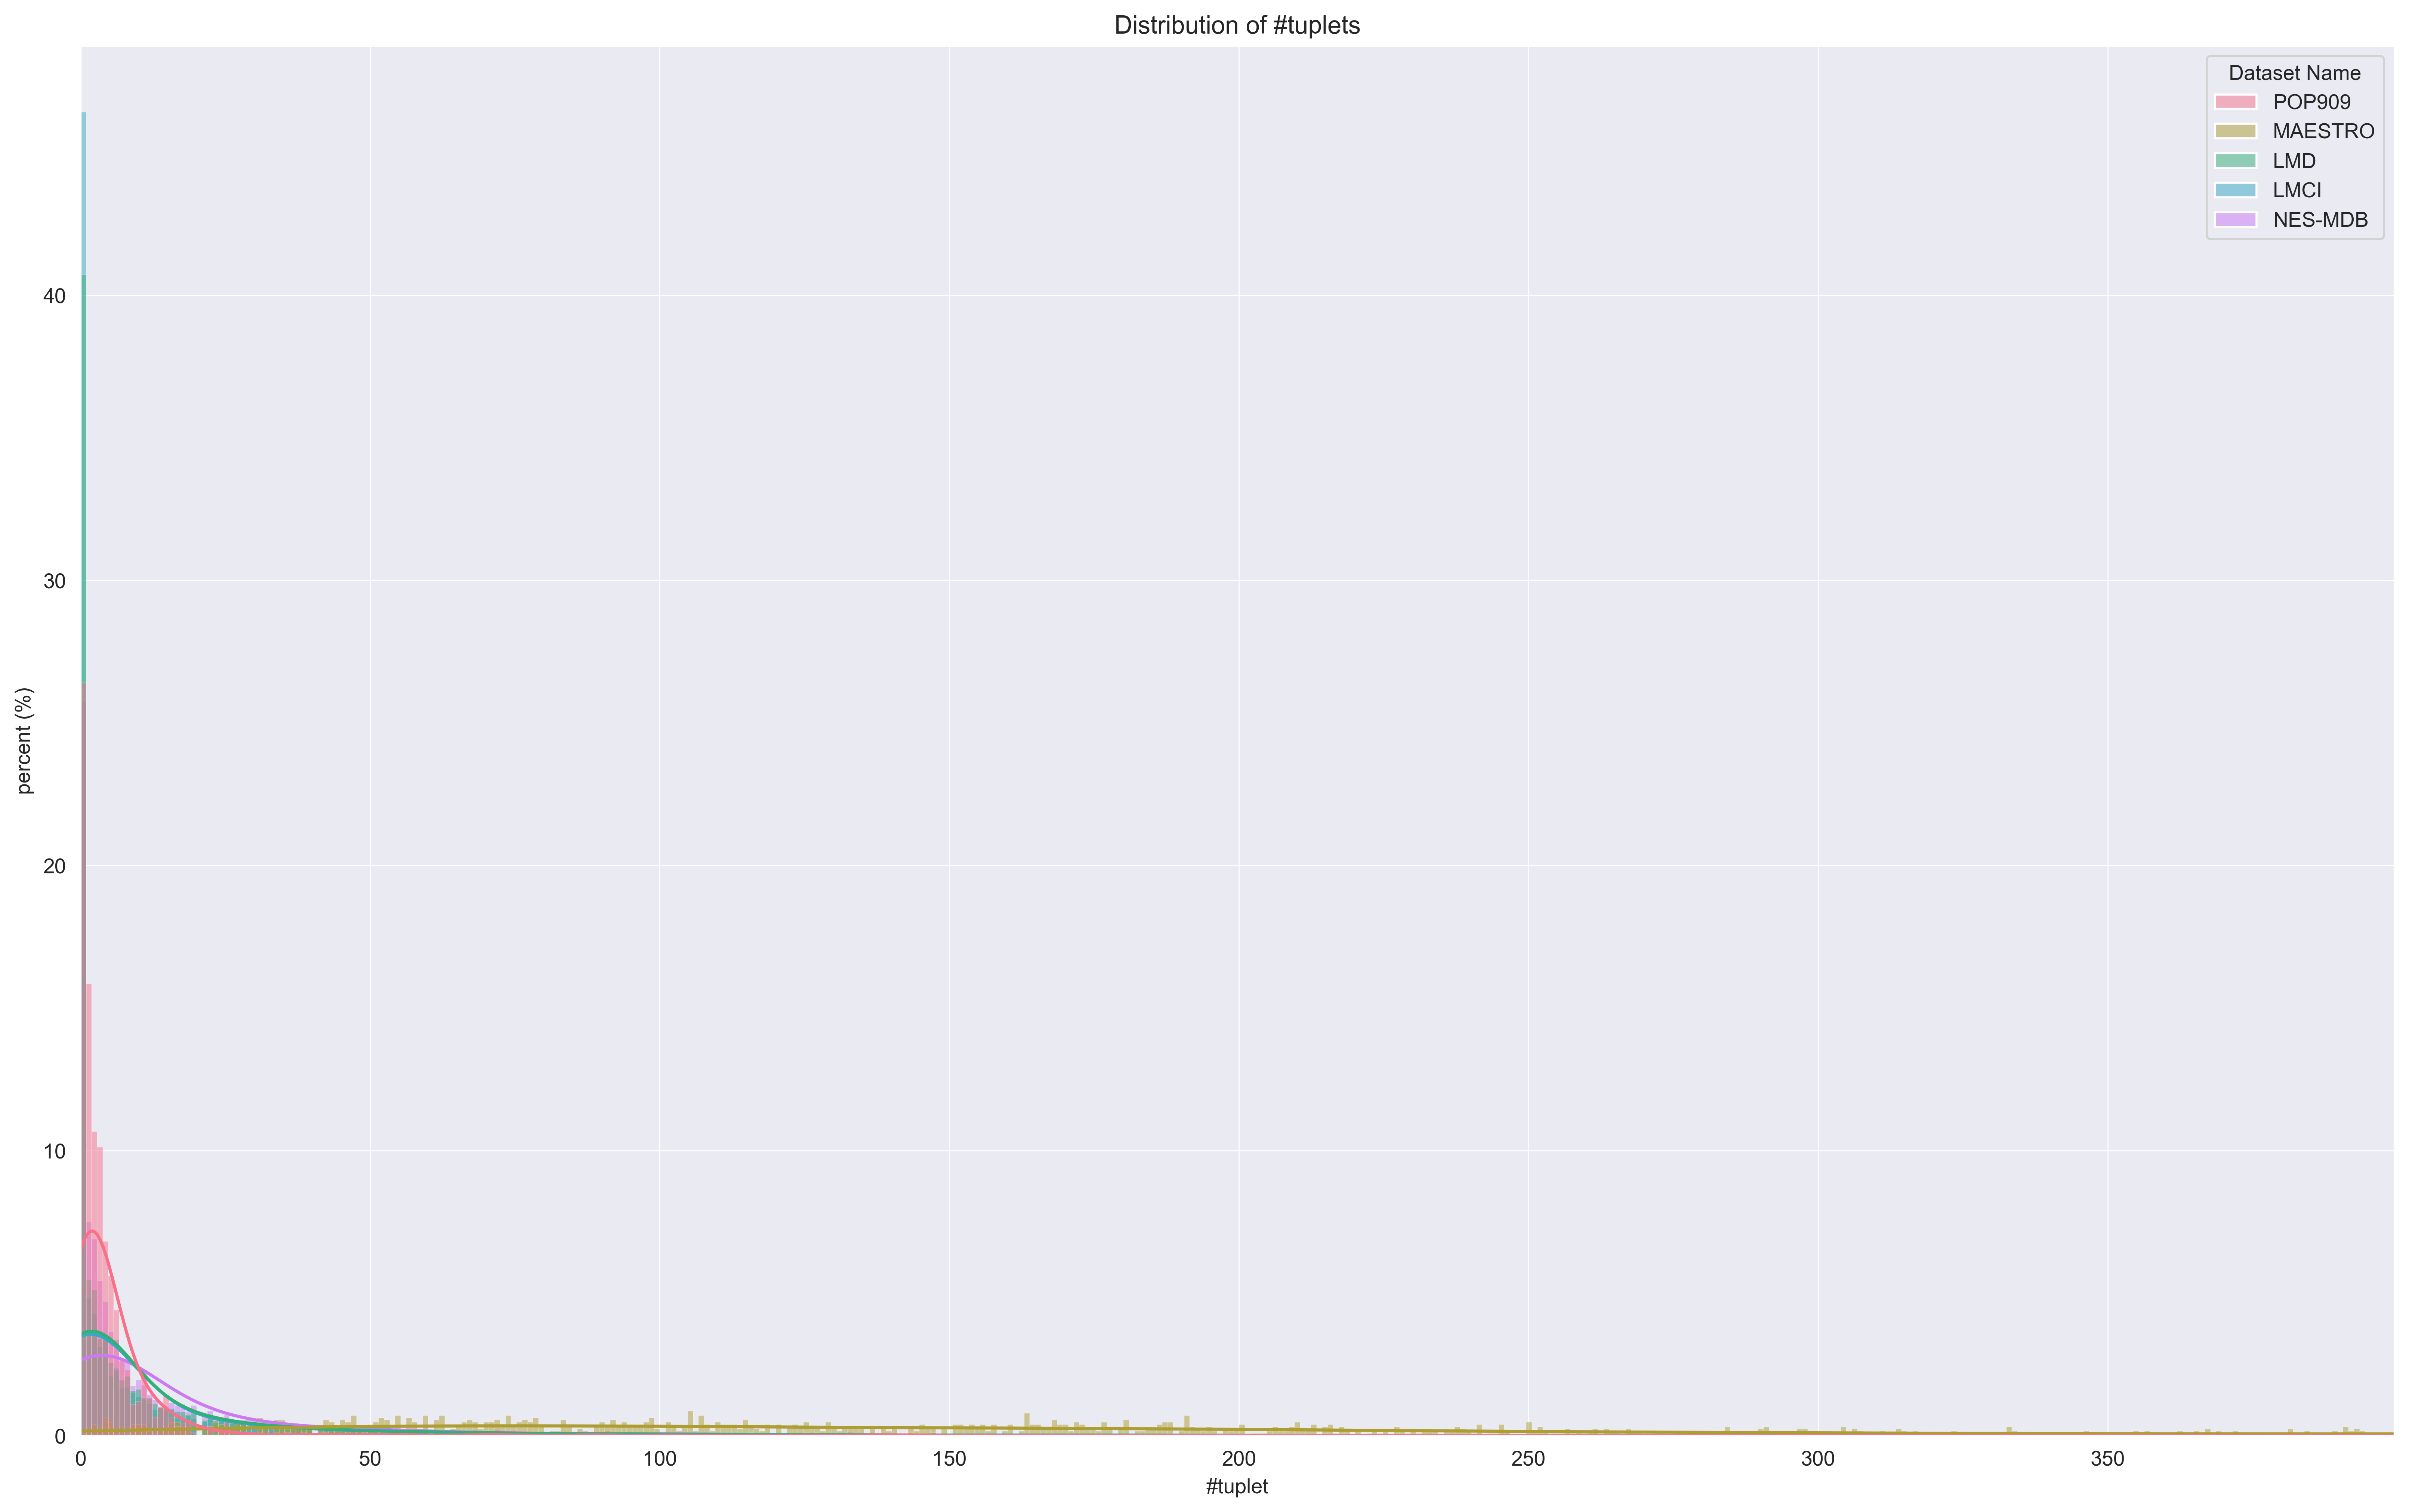

ic| mv.tuplet_count_dist(**args).df:      dataset_name  n_tup  count
                                     0            LMCI      0   5901
                                     1            LMCI      1    615
                                     2            LMCI      2    543
                                     3            LMCI      3    396
                                     4            LMCI      4    426
                                     5            LMCI      5    265
                                     6            LMCI      6    301
                                     7            LMCI      7    212
                                     8            LMCI      8    220
                                     9            LMCI      9    194
                                     10           LMCI     10    175
                                     11           LMCI     11    163
                                     12           LMCI     12    143
                                  

2023-04-25 20:21:07|[Music Visualizer]::tuplet_n_note_dist::music_visualize.py:380:INFO: Getting stats... 
2023-04-25 20:21:07|[Music Visualizer]::hist_wrapper::music_visualize.py:310:INFO: Plotting... 


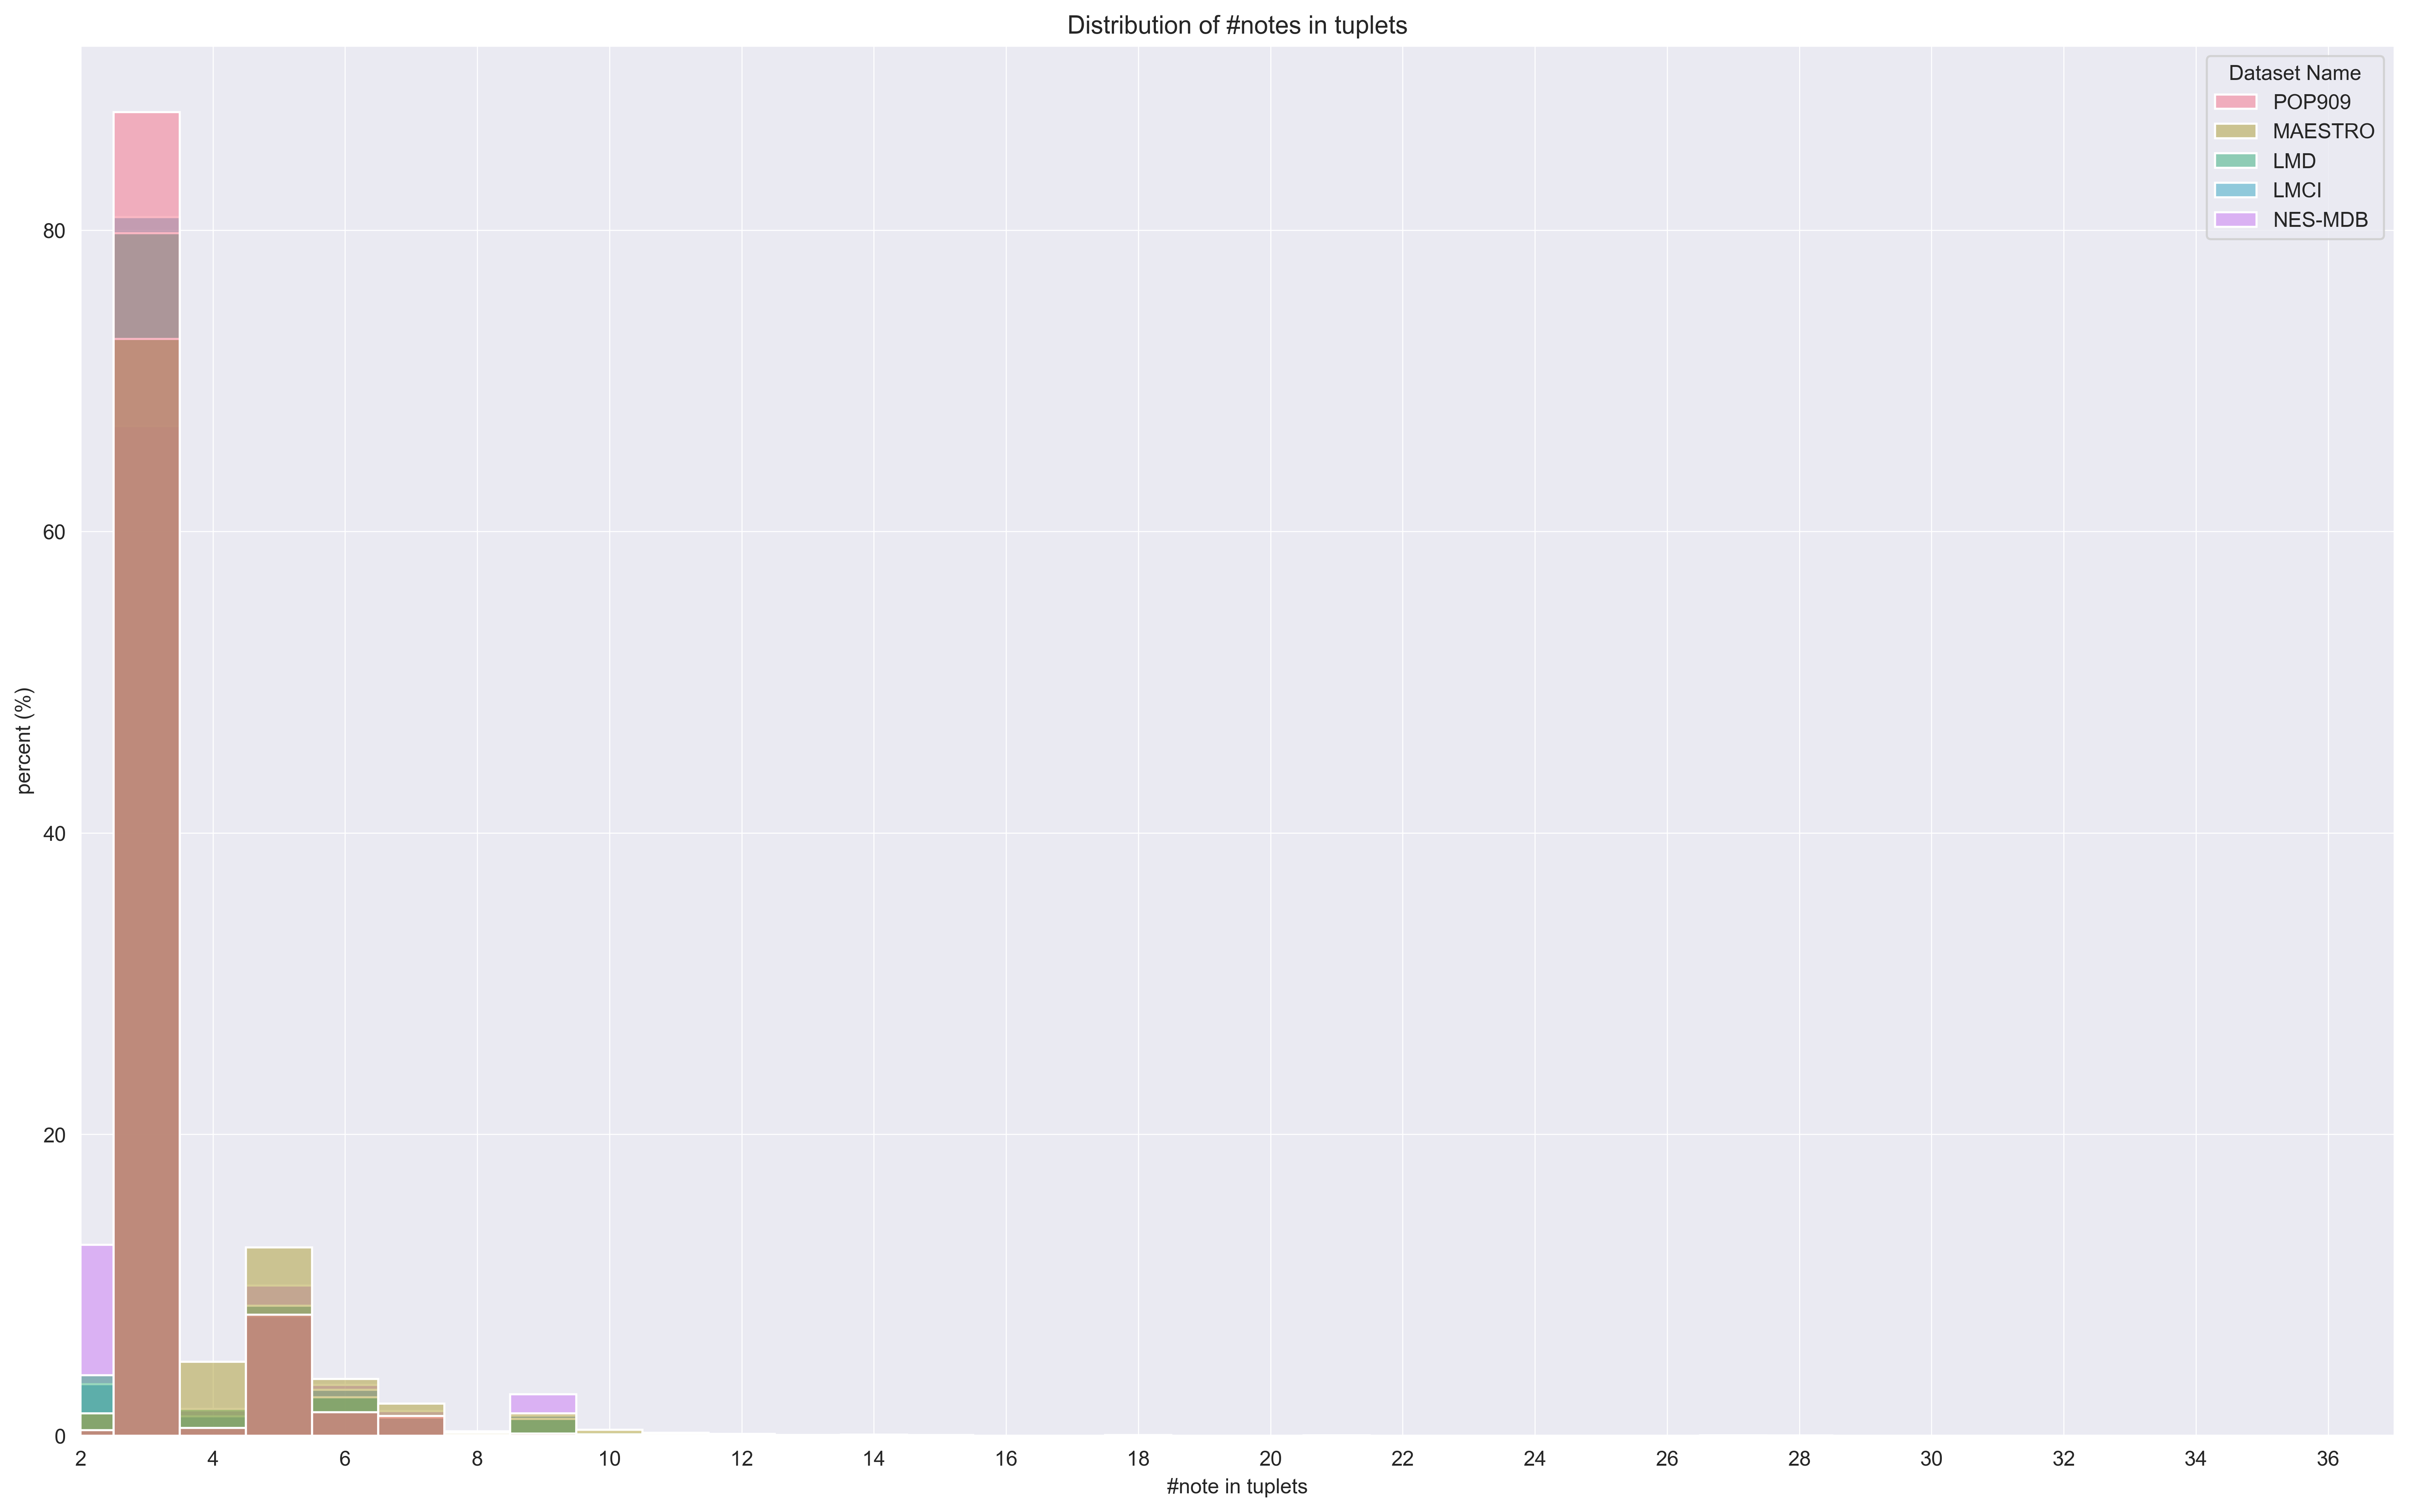

ic| mv.tuplet_n_note_dist(**args).df:      n_tuplet_note   count dataset_name
                                      0                3    4806       POP909
                                      1                5     440       POP909
                                      2                2      20       POP909
                                      3                4      28       POP909
                                      4                6      86       POP909
                                      5                8       3       POP909
                                      6                7      72       POP909
                                      7                9       8       POP909
                                      8               10       5       POP909
                                      9               13       1       POP909
                                      10              11       3       POP909
                                      11               3  168000

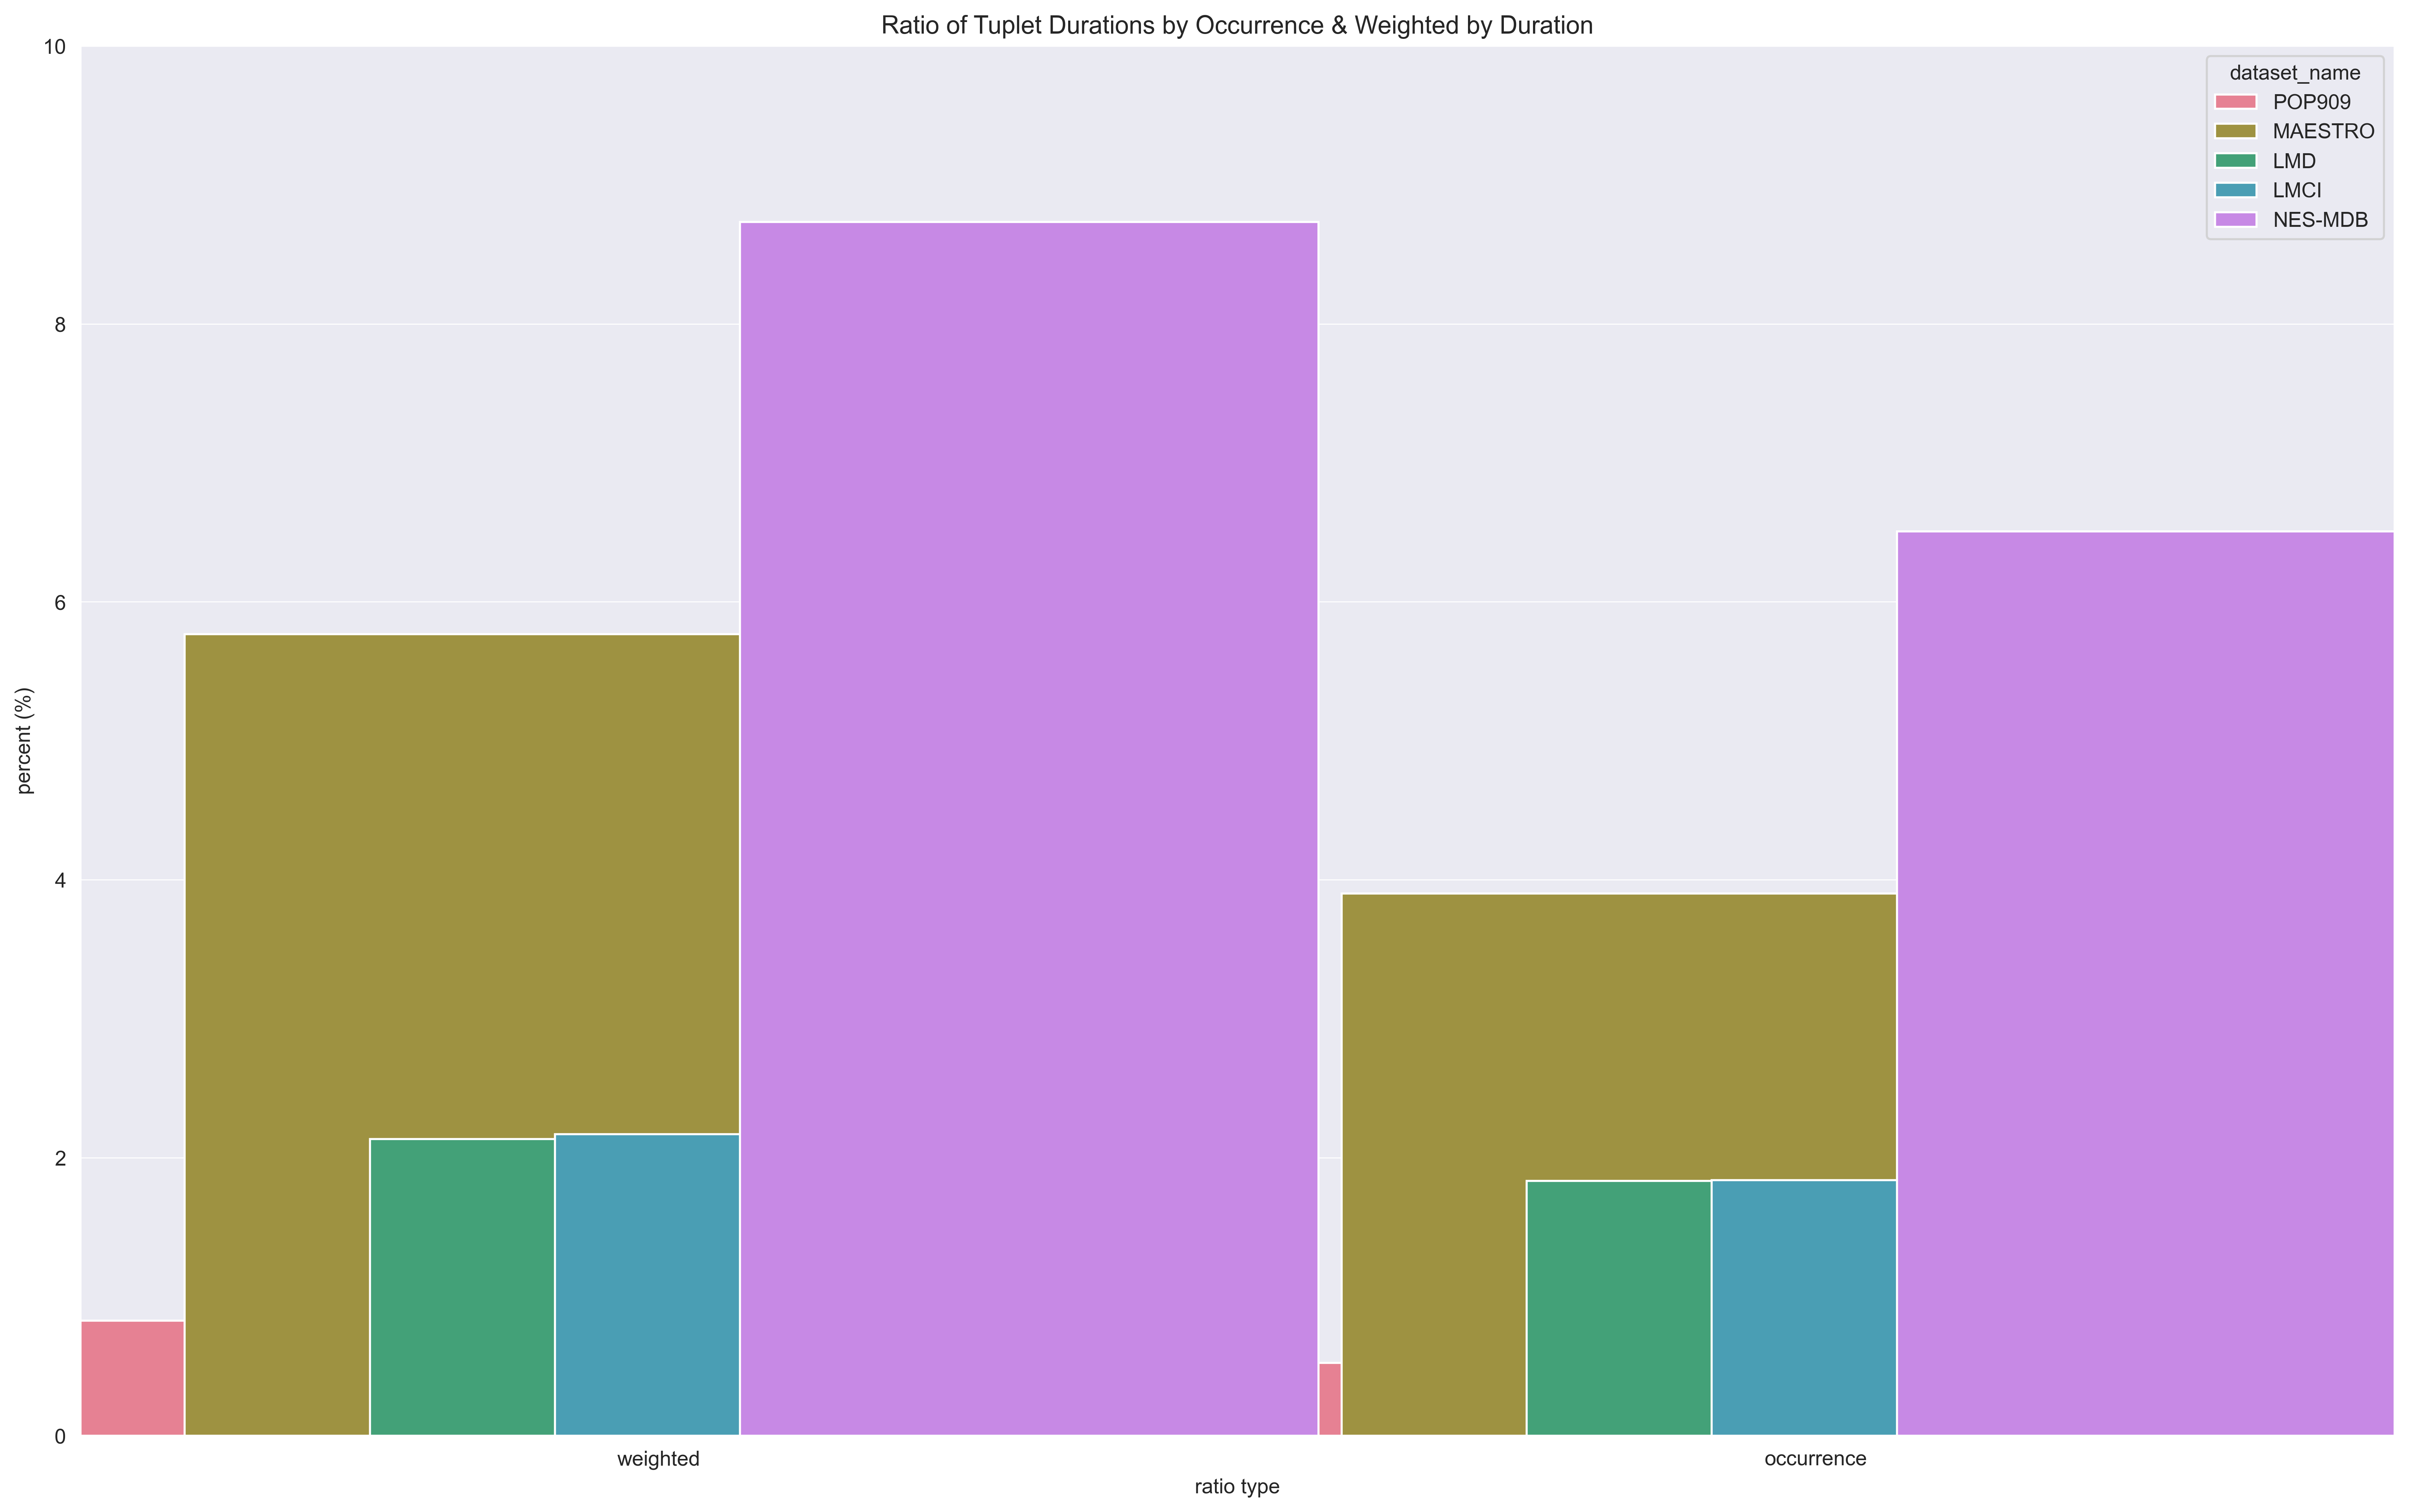

ic| mv.tuplet_duration_ratio().df:   dataset_name  ratio        kind           x     y
                                   0         LMCI   2.17    weighted    weighted  2.17
                                   1          LMD   2.13    weighted    weighted  2.13
                                   2      MAESTRO   5.77    weighted    weighted  5.77
                                   3      NES-MDB   8.73    weighted    weighted  8.73
                                   4       POP909   0.83    weighted    weighted  0.83
                                   5         LMCI   1.84  occurrence  occurrence  1.84
                                   6          LMD   1.83  occurrence  occurrence  1.83
                                   7      MAESTRO   3.90  occurrence  occurrence  3.90
                                   8      NES-MDB   6.51  occurrence  occurrence  6.51
                                   9       POP909   0.53  occurrence  occurrence  0.53


In [6]:
mic(mv.tuplet_count_dist(**args).df)
mic(mv.tuplet_n_note_dist(**args).df)
mic(mv.tuplet_duration_ratio().df);



ic| len(null_count): 560
ic| mv.token_coverage_dist(ratio=0.99).meta: {'LMCI': {'counter': Counter({'d_1/2': 4567427,
                                                                           'd_1/4': 2704725,
                                                                           'd_1': 2338033,
                                                                           '<bar>': 1230329,
                                                                           '<melody>': 1230329,
                                                                           '<bass>': 1230329,
                                                                           'p_r': 804959,
                                                                           'd_1/8': 648128,
                                                                           'd_2': 538098,
                                                                           'p_10/2_A': 390959,
                                                

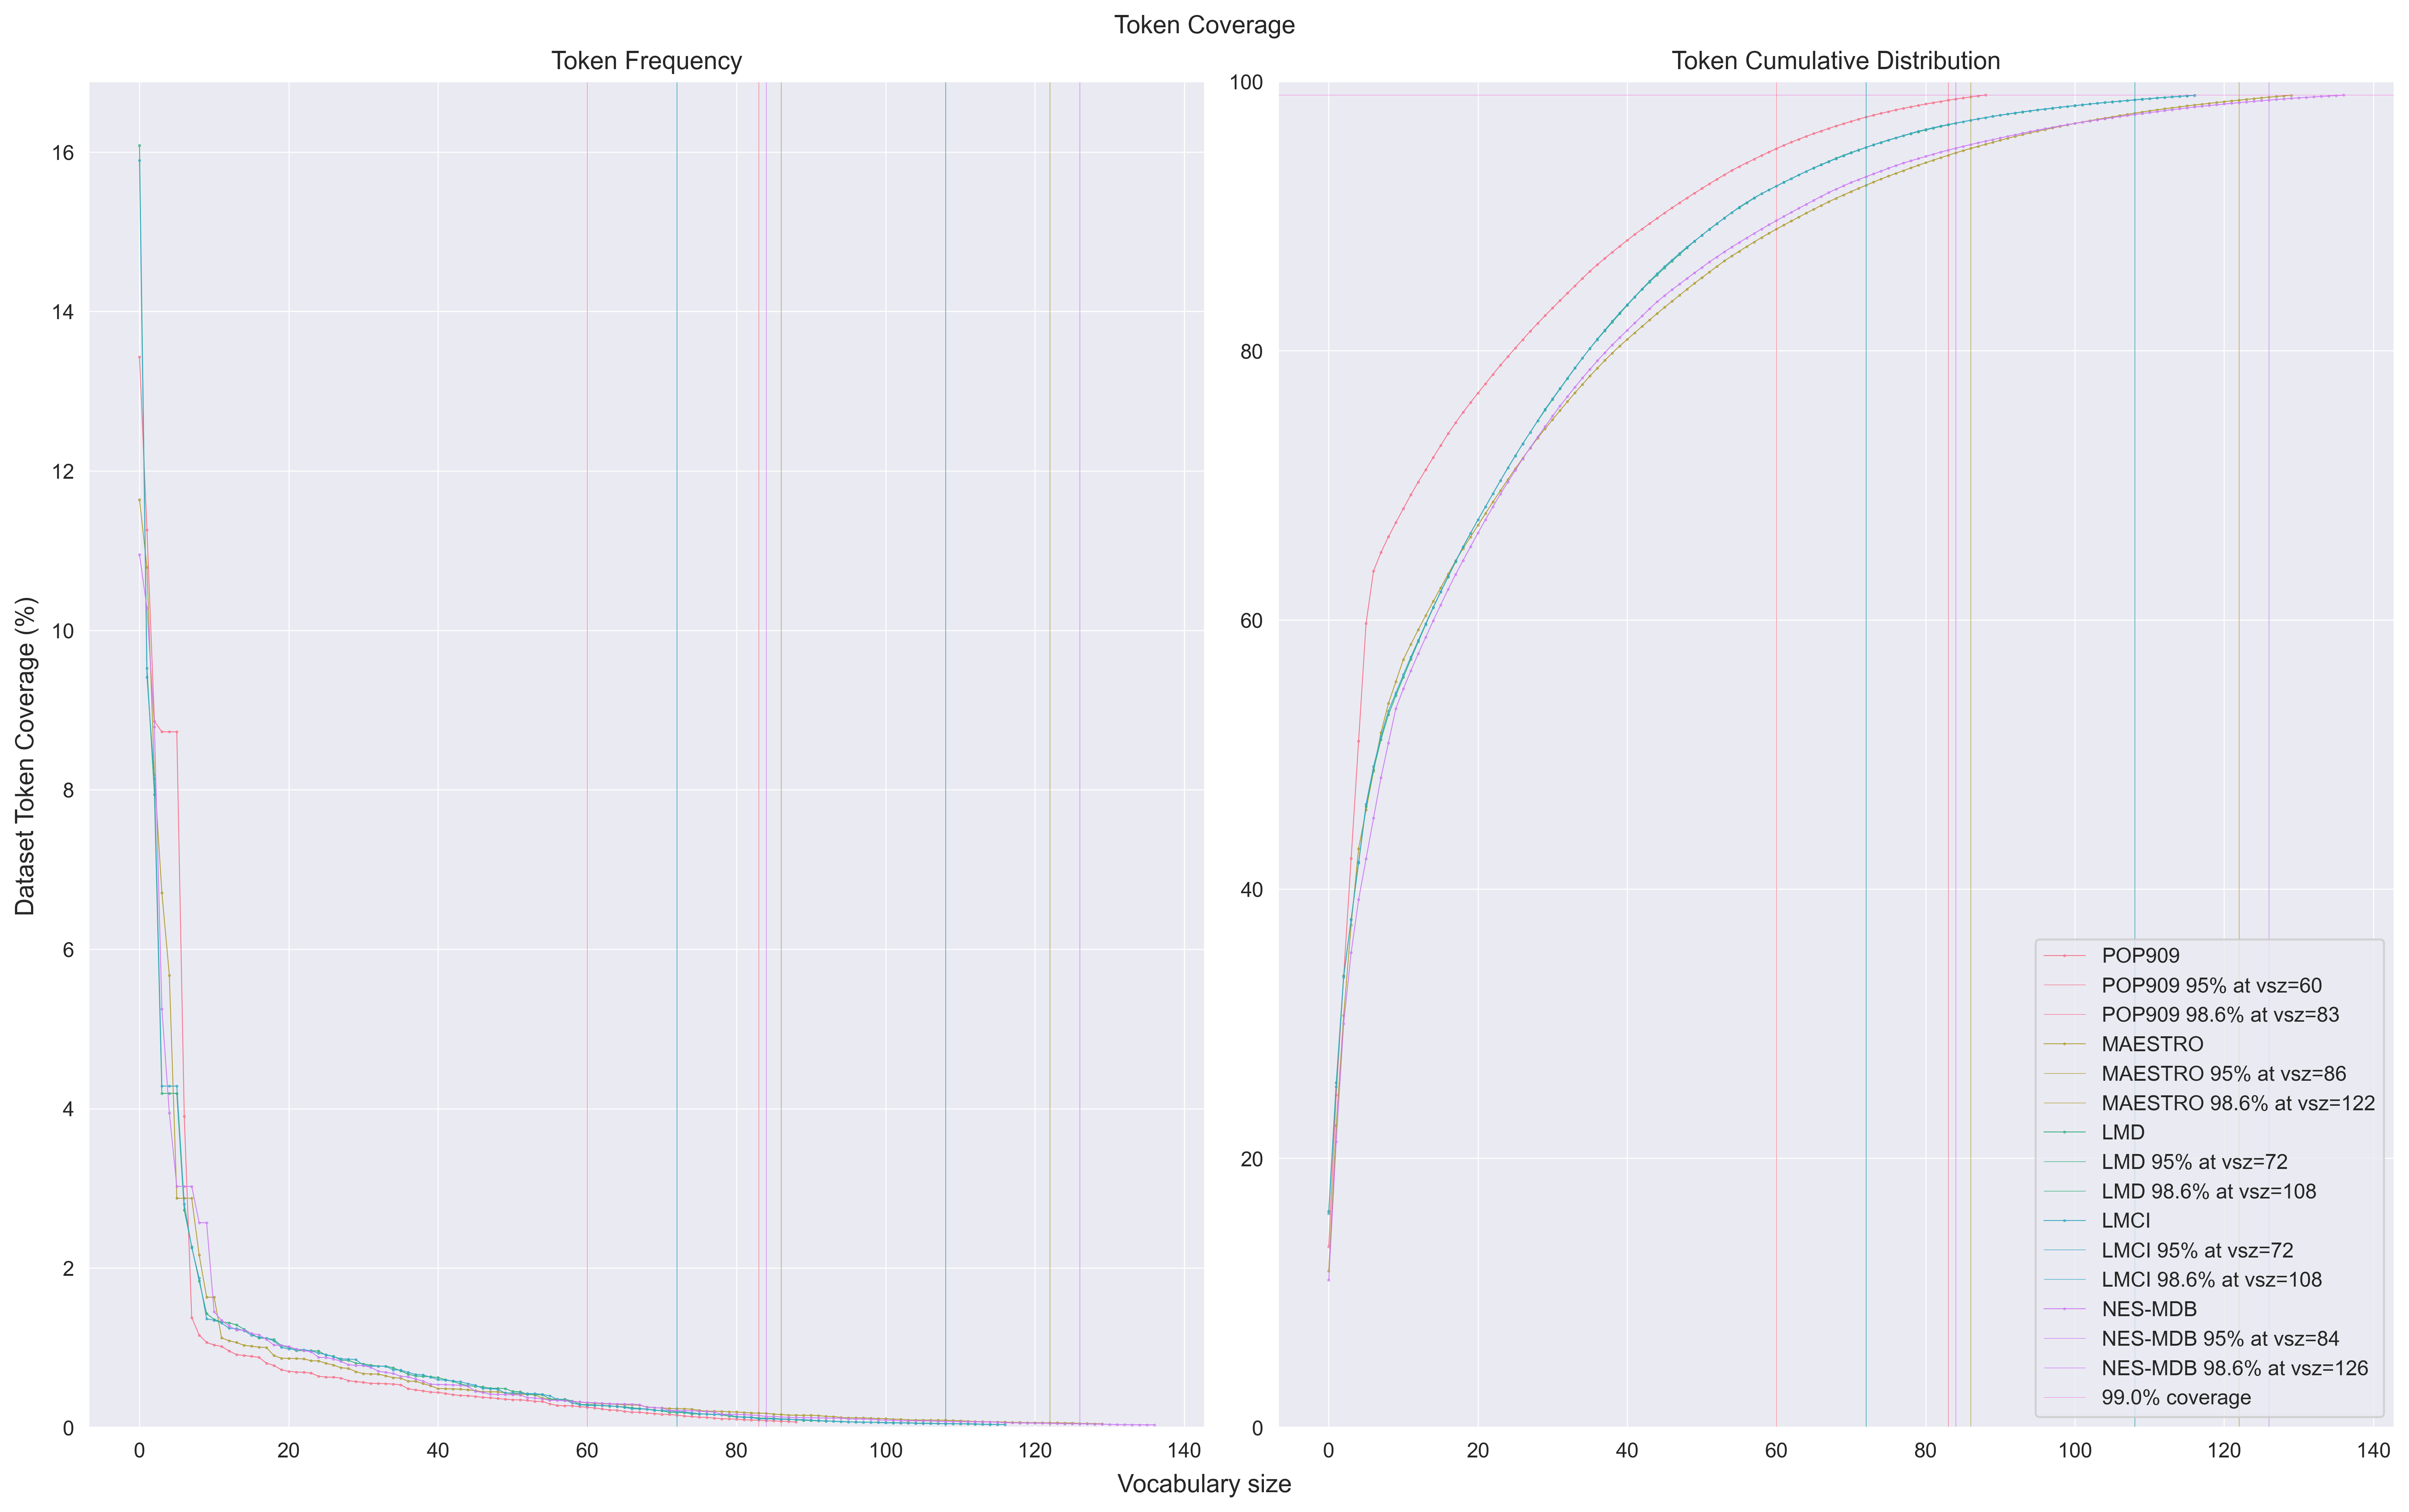

In [7]:
mic(mv.token_coverage_dist(ratio=0.99).meta);



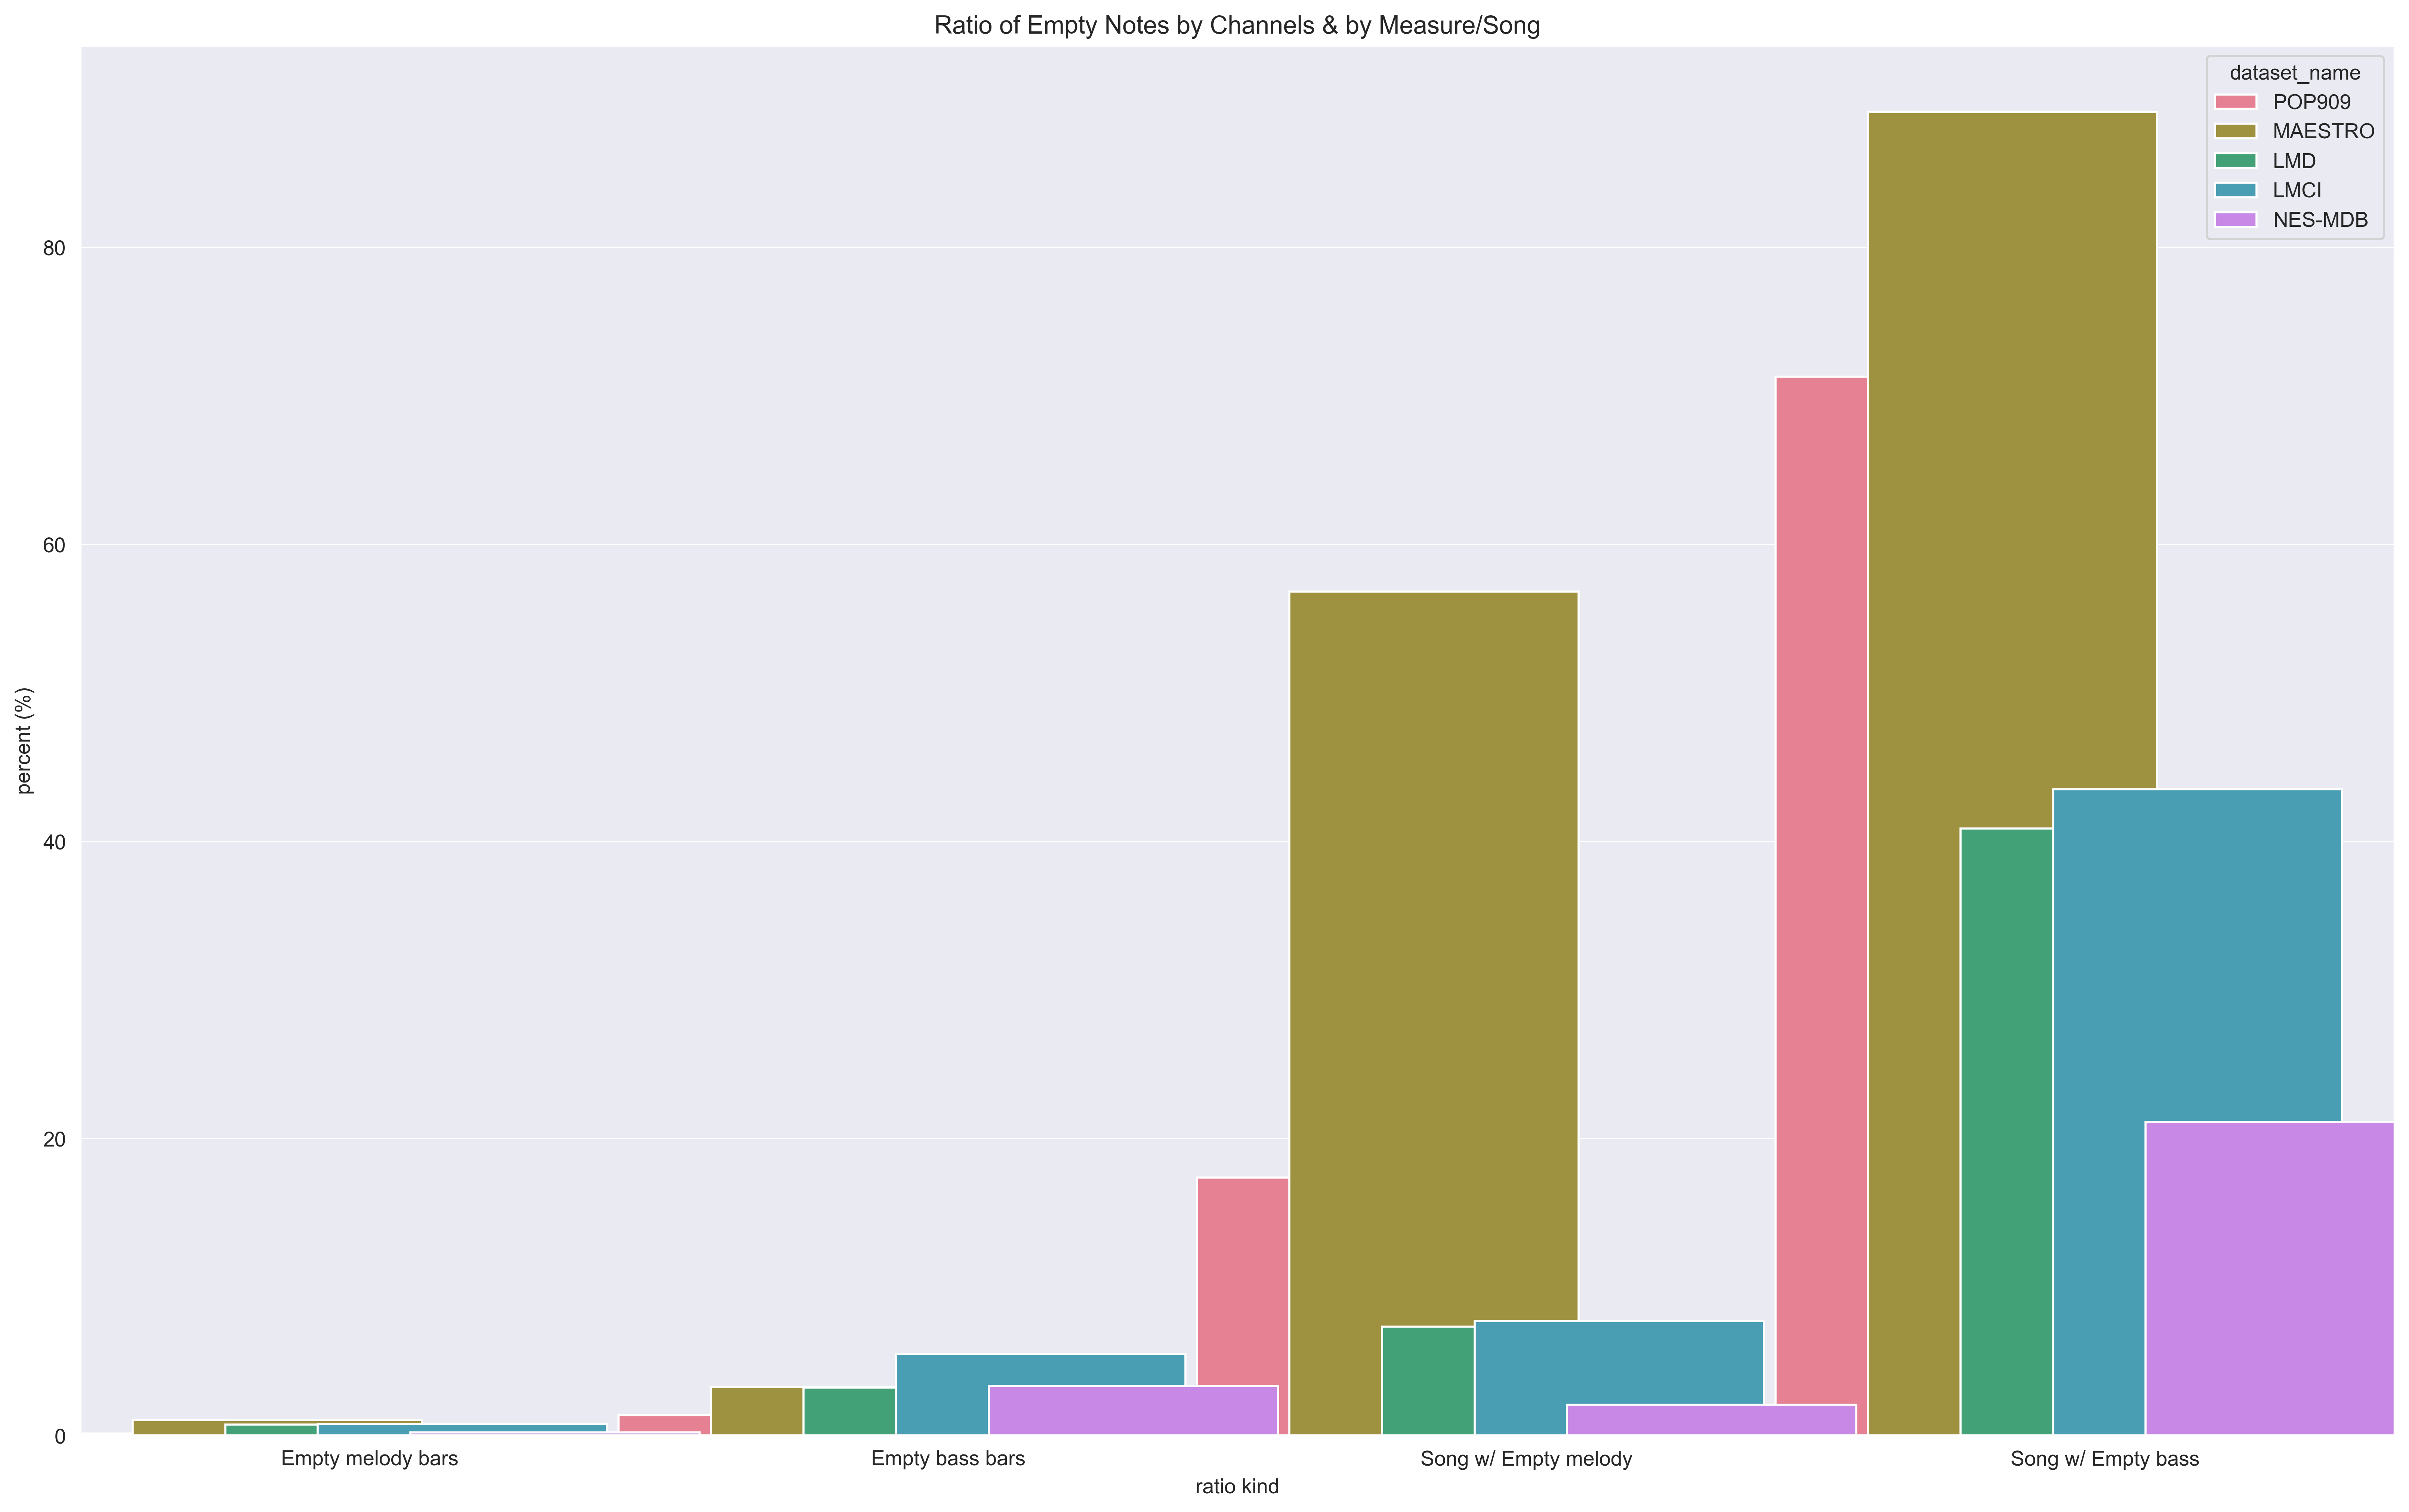

ic| mv.empty_channel_ratio().df:                    ratio  count dataset_name  percent                     x      y
                                 0      Empty melody bars    359       POP909     0.14     Empty melody bars   0.14
                                 1        Empty bass bars   3441       POP909     1.38       Empty bass bars   1.38
                                 2      Empty melody bars   4224      MAESTRO     1.04     Empty melody bars   1.04
                                 3        Empty bass bars  13302      MAESTRO     3.28       Empty bass bars   3.28
                                 4      Empty melody bars  12938          LMD     0.73     Empty melody bars   0.73
                                 5        Empty bass bars  56915          LMD     3.22       Empty bass bars   3.22
                                 6      Empty melody bars   9257         LMCI     0.75     Empty melody bars   0.75
                                 7        Empty bass bars  67704        

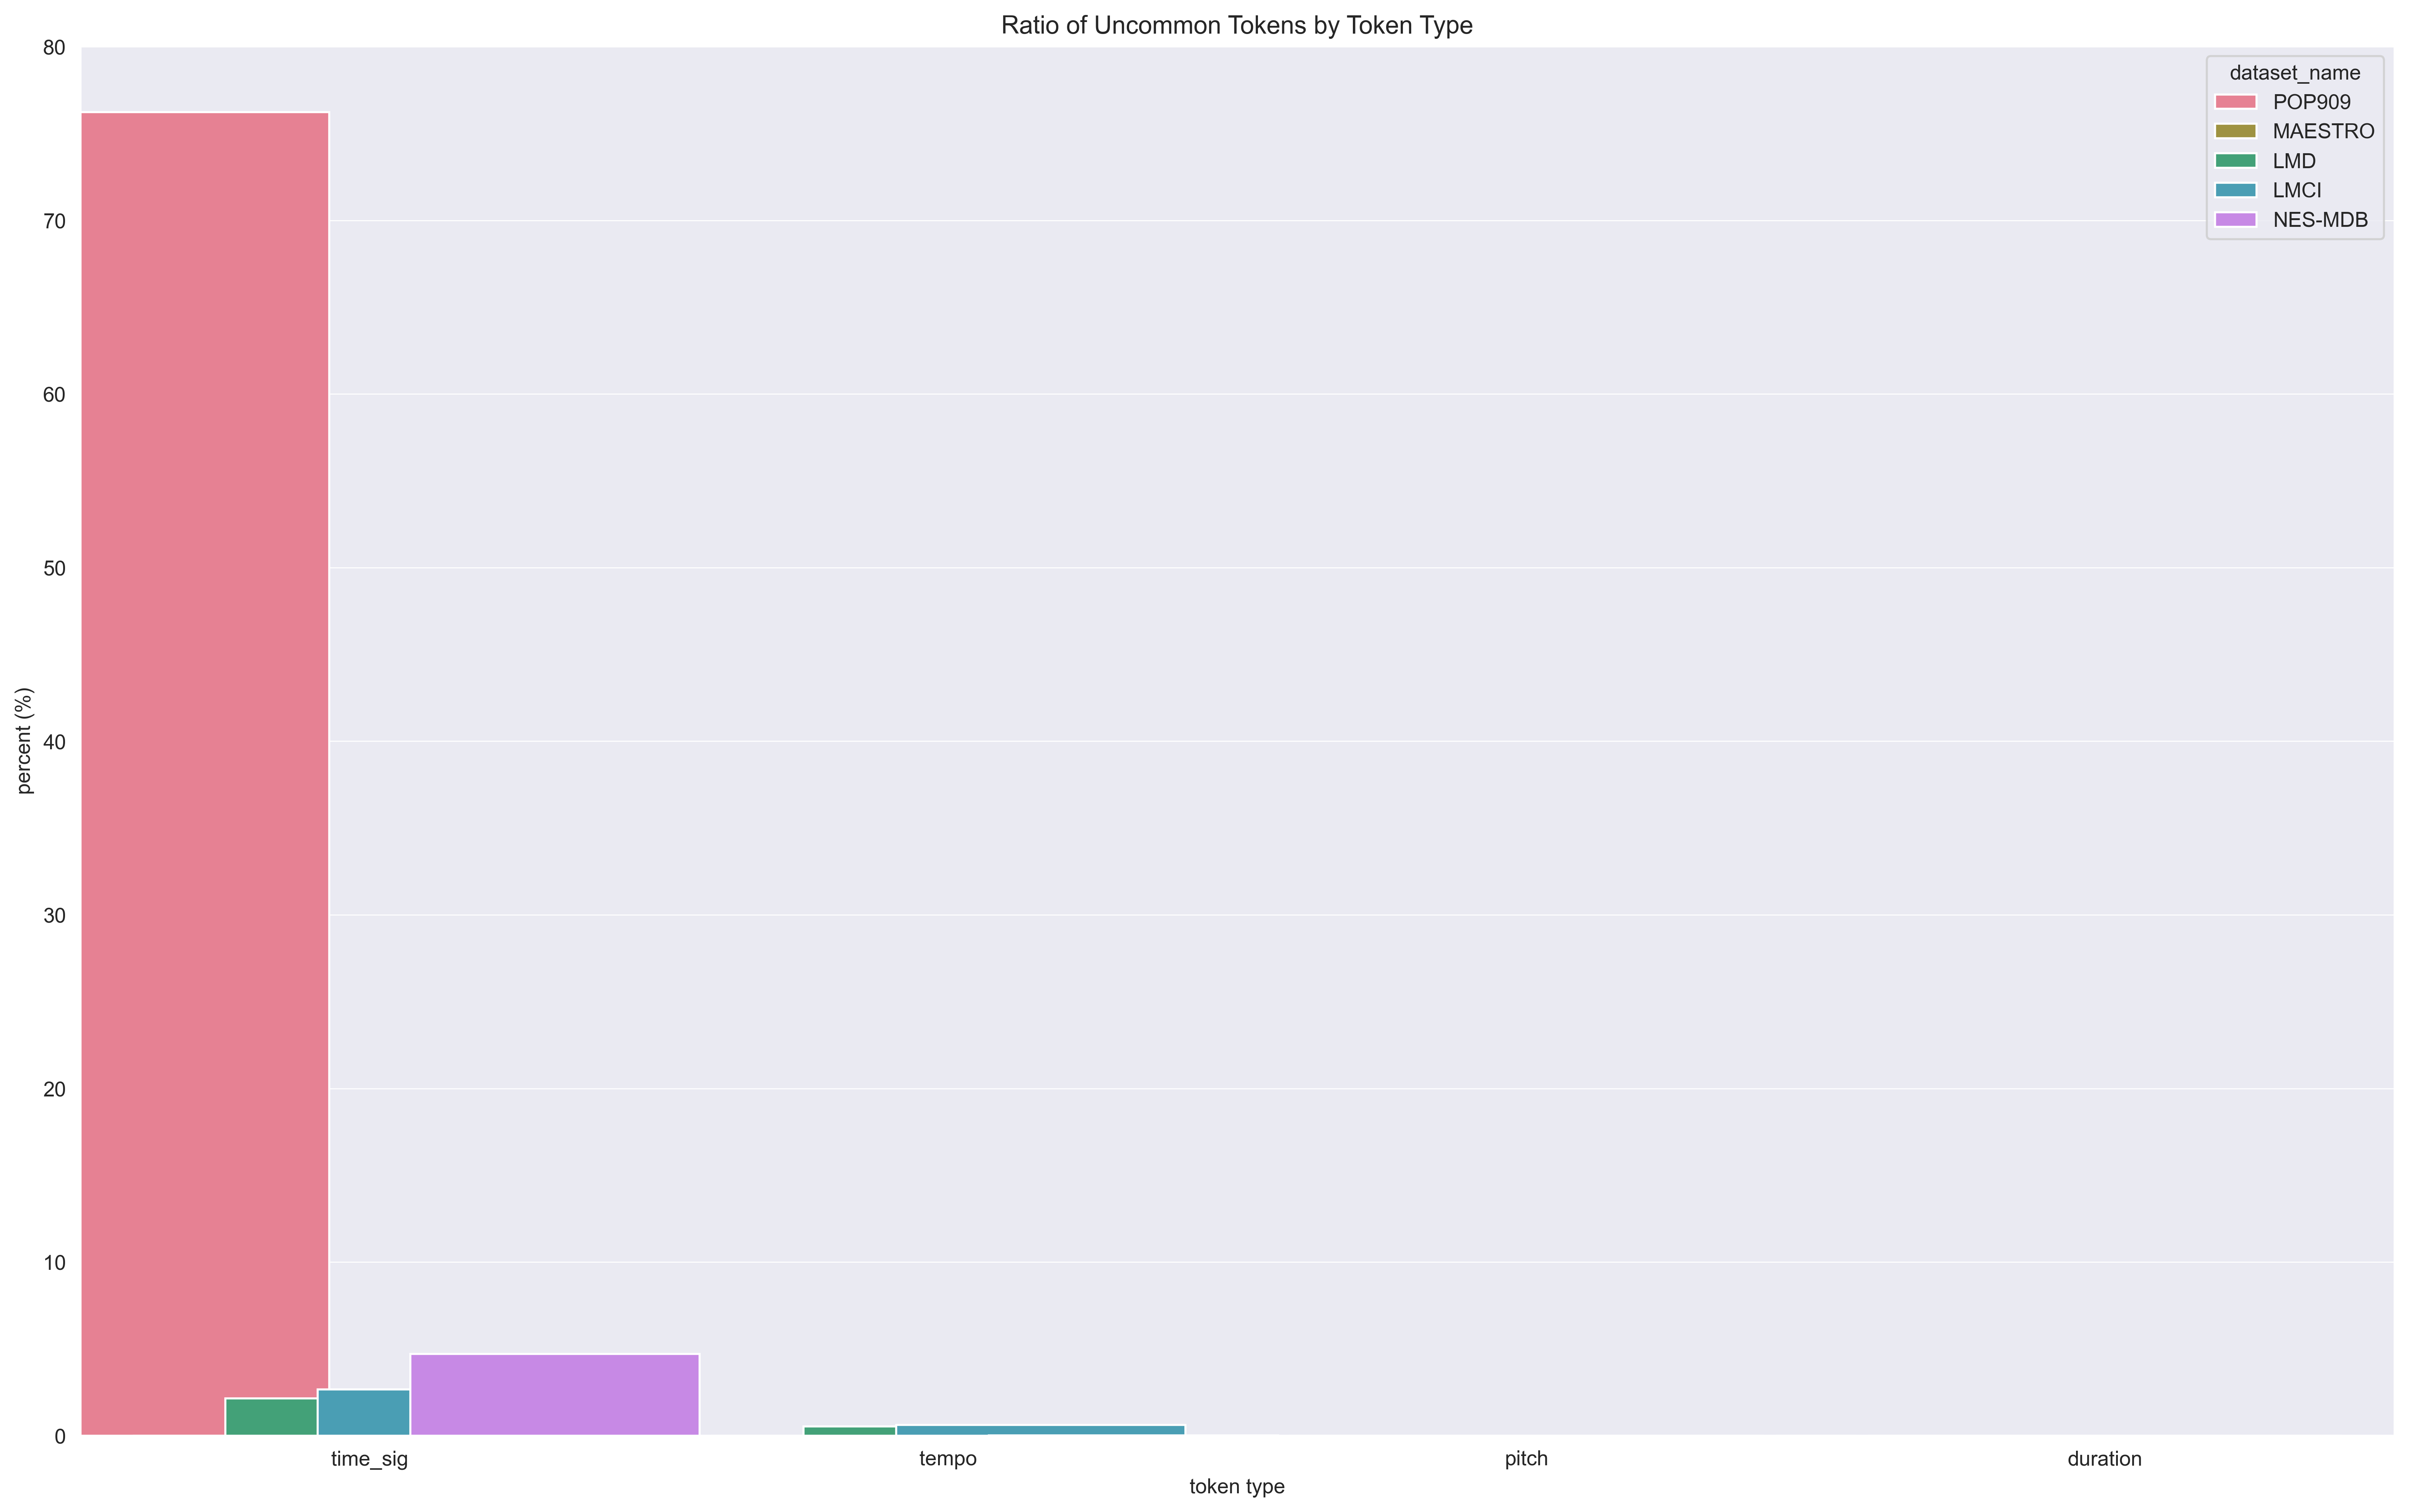

ic| mv.rare_token_ratio().df:         kind dataset_name     ratio         x         y
                              0   time_sig       POP909  7.62e+01  time_sig  7.62e+01
                              1      tempo       POP909  0.00e+00     tempo  0.00e+00
                              2      pitch       POP909  0.00e+00     pitch  0.00e+00
                              3   duration       POP909  0.00e+00  duration  0.00e+00
                              4   time_sig      MAESTRO  0.00e+00  time_sig  0.00e+00
                              5      tempo      MAESTRO  0.00e+00     tempo  0.00e+00
                              6      pitch      MAESTRO  0.00e+00     pitch  0.00e+00
                              7   duration      MAESTRO  0.00e+00  duration  0.00e+00
                              8   time_sig          LMD  2.15e+00  time_sig  2.15e+00
                              9      tempo          LMD  5.38e-01     tempo  5.38e-01
                              10     pitch          LM

In [8]:
mic(mv.empty_channel_ratio().df)
mic(mv.rare_token_ratio().df);



2023-04-25 20:22:25|[Music Visualizer]::warning_type_dist::music_visualize.py:837:INFO: Getting stats... 
2023-04-25 20:23:51|[Music Visualizer]::warning_type_dist::music_visualize.py:858:INFO: Plotting... 


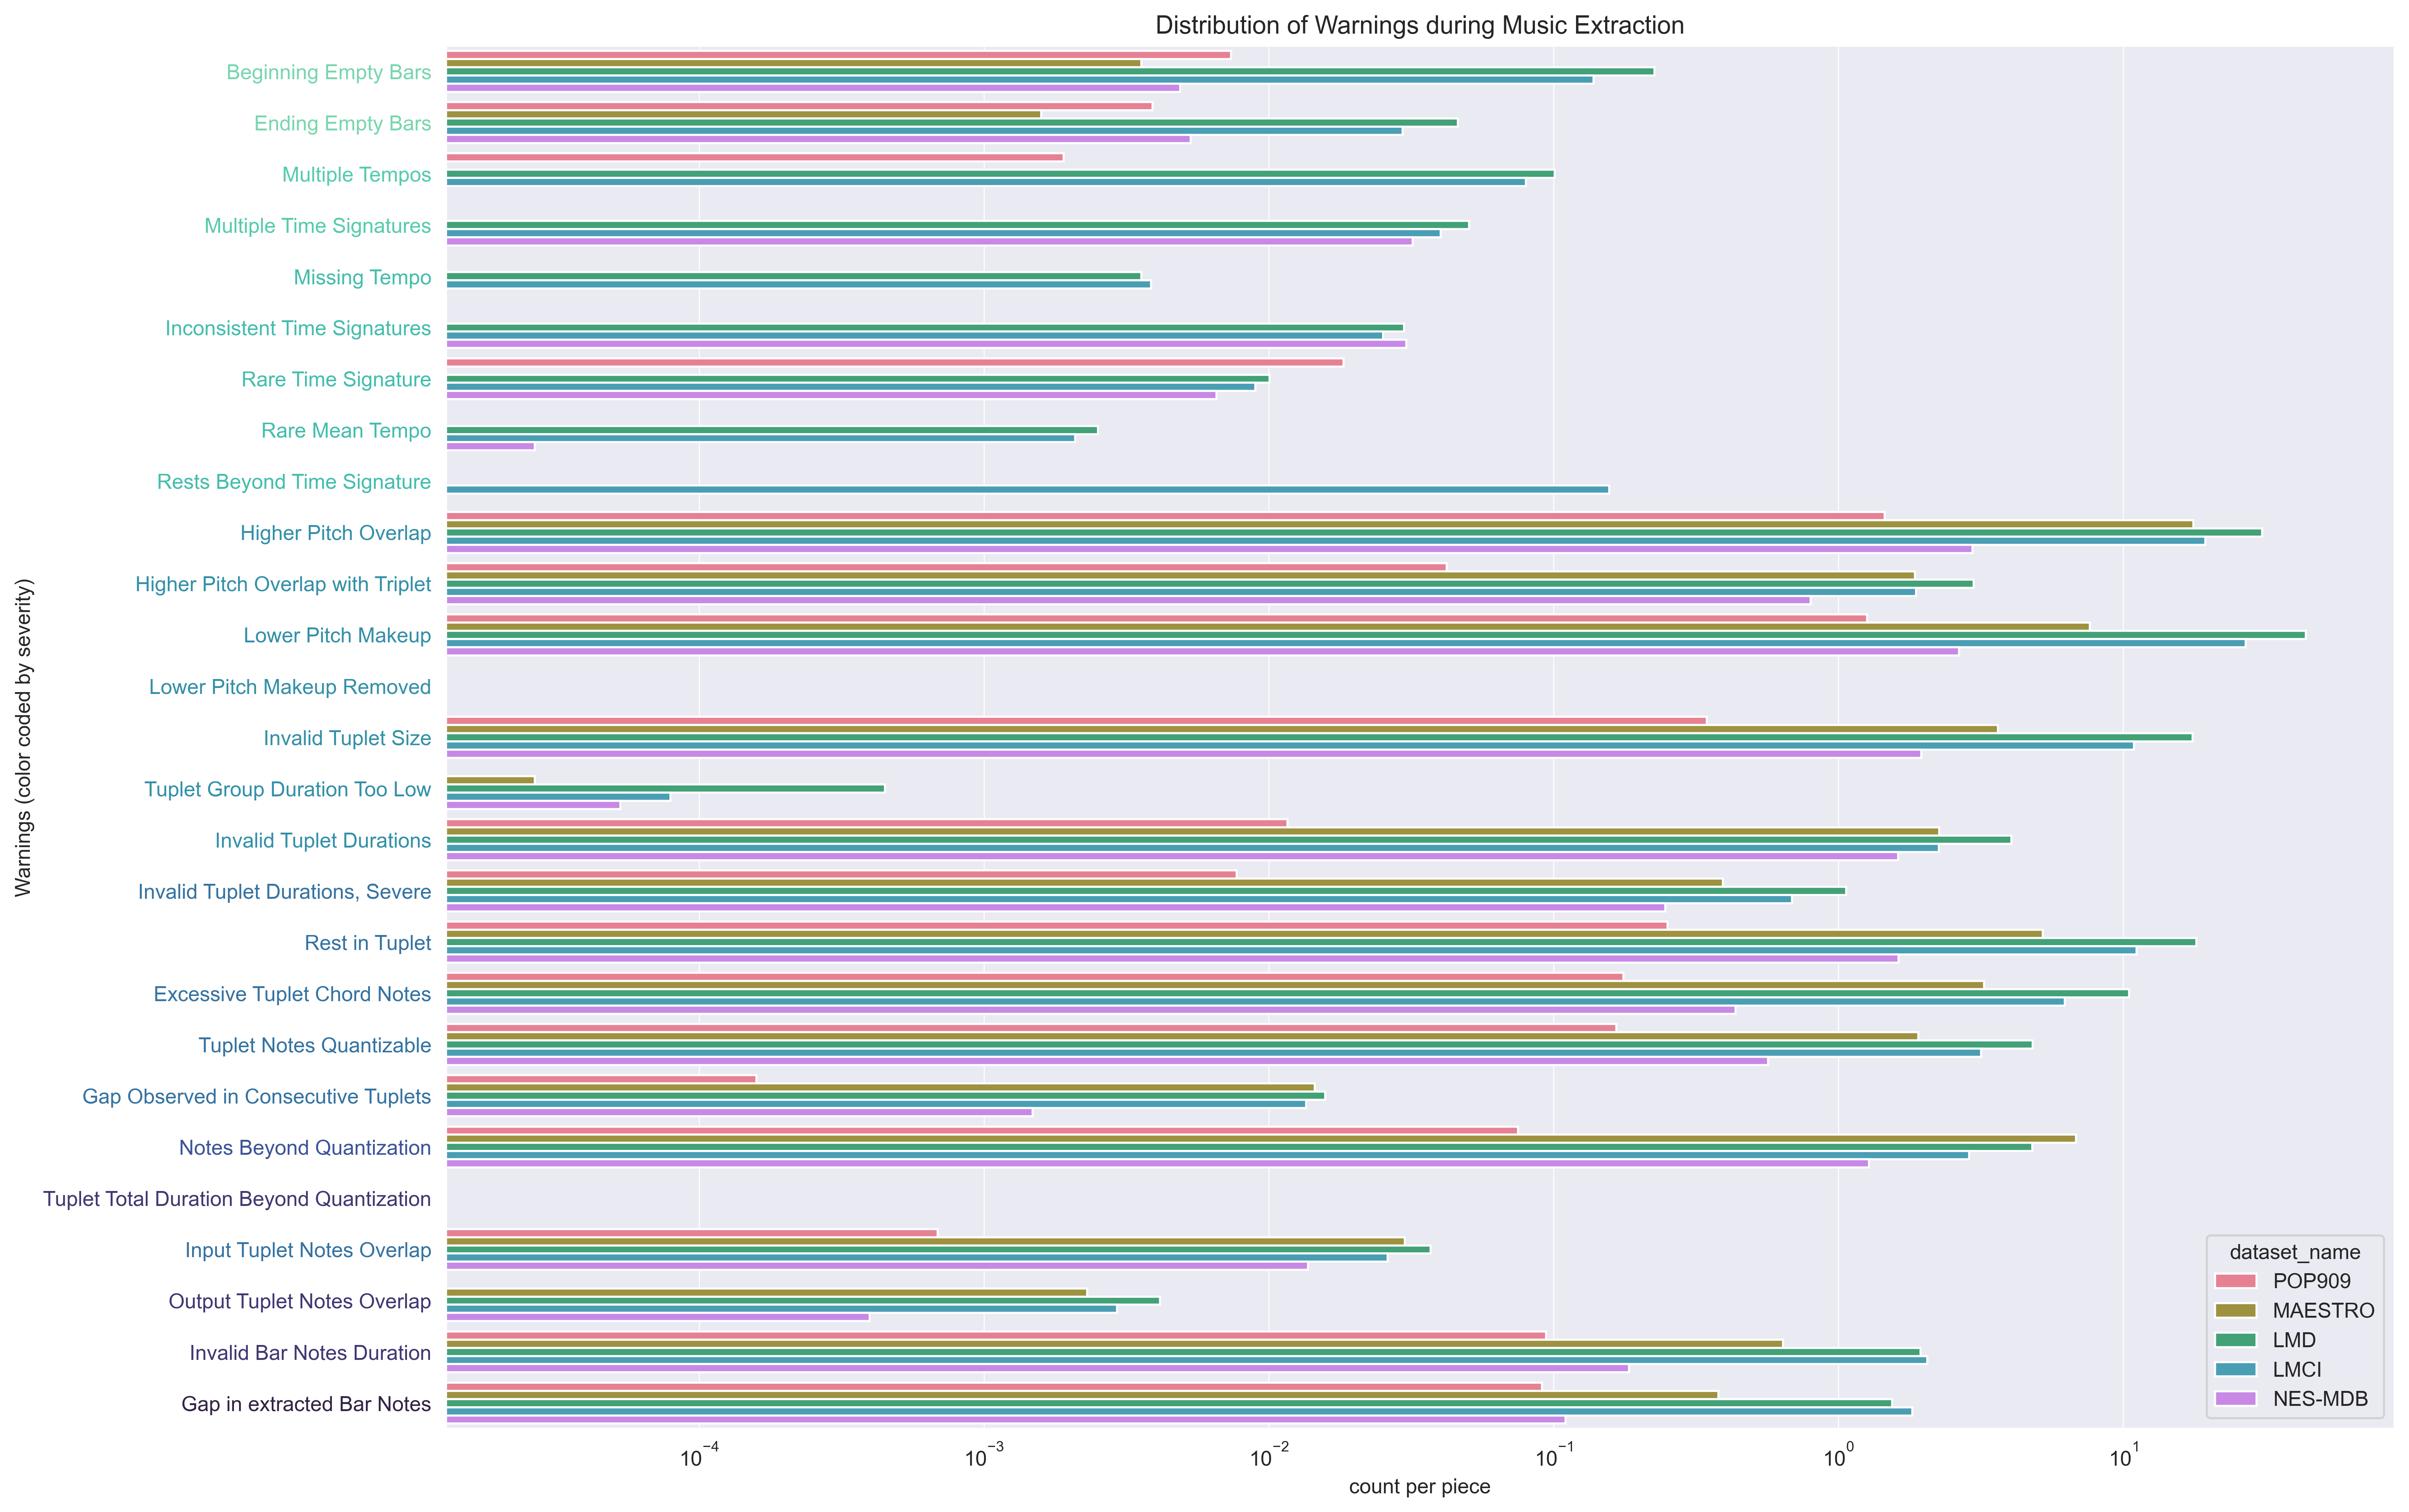

ic| mv.warning_type_dist().df:                                    type  total_count  average_count dataset_name                                    x         y
                               0                  Higher Pitch Overlap        54990       1.45e+00       POP909                 Higher Pitch Overlap  1.45e+00
                               1                    Lower Pitch Makeup        47749       1.26e+00       POP909                   Lower Pitch Makeup  1.26e+00
                               2                   Invalid Tuplet Size        13063       3.45e-01       POP909                  Invalid Tuplet Size  3.45e-01
                               3                        Rest in Tuplet         9506       2.51e-01       POP909                       Rest in Tuplet  2.51e-01
                               4          Excessive Tuplet Chord Notes         6658       1.76e-01       POP909         Excessive Tuplet Chord Notes  1.76e-01
                               5              

In [9]:
mic(mv.warning_type_dist().df);

